
<a href="https://github.com/llThanell/Stock-Analysis">FULL FILE WITH IMAGES & DATASET<-LINK</a>

# Introduction

The stock market is an important channel in attracting investment capital. In Vietnam, the VN30 stock index is calculated from the trading results of the 30 largest capitalization enterprises of the economy. Investors and economic analysts often use this index's forecast the activities of the economy. However, the information and data affecting the fluctuation of the VN30 stock index are often very large, which is the main obstacle when forecasting this index.

<img src="stock.png">

Since the buying and selling prices are linearly correlated, we will mainly analyze the buying prices to avoid data duplication.

# Import statement

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mplcursors
import plotly_express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Importing data

In [2]:
with open('df_merged.pkl', 'rb') as f:
    data = pickle.load(f)
    
##convert data order by day
data = list(reversed(data))

Since the data is sorted from the most recent date to the oldest, we need to reverse it to facilitate the analysis.

# Understanding the data

The three exchanges HoSE, HNX, and UPCoM all trade from Monday to Friday, except during Tet holidays as regulated. The exchanges start trading at 9 am (except for futures products which start trading at 8:45 am), take a break from 11:30 am to 1 pm, and close at 3 pm.

In [3]:
data[0].info()
data[0].isnull().sum()
# dataset has no null observation

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1335 entries, 2023-03-20 02:17:00+00:00 to 2023-03-20 07:31:00+00:00
Columns: 181 entries, mua_gia_1ACB to ban_kl_2VRE
dtypes: float64(181)
memory usage: 1.9 MB


mua_gia_1ACB    0
mua_gia_1BCM    0
mua_gia_1BID    0
mua_gia_1BVH    0
mua_gia_1CTG    0
               ..
ban_kl_2VIC     0
ban_kl_2VJC     0
ban_kl_2VNM     0
ban_kl_2VPB     0
ban_kl_2VRE     0
Length: 181, dtype: int64

In [4]:
data[0].describe()

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  mua_gia_1CTG  \
count   1335.000000   1335.000000   1335.000000   1335.000000   1335.000000   
mean      24.106624     81.029513     45.610406     49.397903     28.505816   
std        0.080124      0.184444      0.217387      0.201573      0.406334   
min       24.000000     80.600000     45.000000     48.900000     21.150000   
25%       24.050000     80.900000     45.550000     49.250000     28.400000   
50%       24.050000     81.100000     45.600000     49.450000     28.550000   
75%       24.175000     81.200000     45.800000     49.500000     28.700000   
max       24.300000     81.500000     45.950000     49.850000     28.900000   

       mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  mua_gia_1HPG  \
count   1335.000000    1335.00000   1335.000000   1335.000000   1335.000000   
mean      78.227416     103.29427     14.564015     17.854510     20.296673   
std        0.290432       0.22128      0.199043      0.450555      0.217859   
min       77.600000     102.90000     11.958333      8.875000     17.185714   
25%       78.100000     103.10000     14.450000     17.750000     20.150000   
50%       78.200000     103.30000     14.550000     17.850000     20.350000   
75%       78.500000     103.50000     14.750000     18.000000     20.450000   
max       79.000000     104.00000     14.850000     18.150000     20.550000   

       ...   ban_kl_2TCB   ban_kl_2TPB  ban_kl_2VCB  ban_kl_2VHM  \
count  ...   1335.000000   1335.000000  1335.000000  1335.000000   
mean   ...    945.011860   2084.149331   218.485643   863.796576   
std    ...   1759.948707   3663.487644   394.307030  1072.009950   
min    ...      0.000000      0.000000     0.000000     0.000000   
25%    ...      0.000000      0.000000     0.000000     0.000000   
50%    ...      0.000000    280.000000     0.000000   220.000000   
75%    ...   1225.000000   2685.000000   340.000000  1730.000000   
max    ...  10230.000000  18130.000000  2160.000000  5910.000000   

        ban_kl_2VIB  ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM   ban_kl_2VPB  \
count   1335.000000  1335.000000  1335.000000  1335.000000   1335.000000   
mean    2728.533030   463.157553    21.931586   490.564295   9739.657060   
std     3944.974727   474.030376    62.800534   690.956561  10775.759581   
min        0.000000     0.000000     0.000000     0.000000      0.000000   
25%        0.000000     0.000000     0.000000     0.000000      0.000000   
50%        0.000000   430.000000     0.000000     0.000000   7240.000000   
75%     4840.000000   830.000000     0.000000   950.000000  15408.333333   
max    25930.000000  2062.500000   420.000000  3460.000000  77040.000000   

       ban_kl_2VRE  
count  1335.000000  
mean    263.390859  
std     547.752491  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%     330.000000  
max    3365.000000  

[8 rows x 181 columns]

Commentary:

The dataset contains 30 stocks belonging to the vnindex30 group, with columns for buy price, sell price, buy volume 1, buy volume 2, sell volume 1, and sell volume 2. We can see that the buy price is slightly lower than the sell price, which is because sellers usually set a higher price for stocks than buyers.

In [5]:
dup_row = data[0][data[0].duplicated()]
len(dup_row)
# Dataset has no duplicated observations

0

# Basic data analysis

The first question is whether there is any time during the day when the market is more active than usual. Calculating the total transaction amount at different times throughout the day and plotting it will answer that question. Since taking all the data would be too much, we will only take the last quartile and examine the distribution.

In [6]:
df1 = data[0]
#Get giamua, giaban, klmua, klban 
giamua = df1.iloc[:,:30]
giaban = df1.iloc[:,30:60]
klmua = df1.iloc[:,61:91]
klban = df1.iloc[:,91:121]

In [7]:
# tranfer dataframe to numpy array 
giamua1 = np.asarray(giamua)
klmua1 = np.asarray(klmua)
klban1 = np.asarray(klban)
giaban1 = np.asarray(giaban)
#get dot product
temp = (giamua1).dot(klmua1.T)
temp1 = (giaban1).dot(klban1.T)
# print(giamua.shape)
# print(klmua.T.shape)
temp

array([[ 814807.33333333,  757289.38789683,  494328.56666667, ...,
         903930.15952381,  776758.        , 1498133.25      ],
       [ 814579.58333333,  757065.48511905,  494114.25416667, ...,
         903896.90952381,  776724.33333333, 1498114.25      ],
       [ 814927.33333333,  757379.49880952,  494087.93944444, ...,
         904044.2547619 ,  776779.5       , 1498181.75      ],
       ...,
       [ 691801.11904762,  640867.65306122,  411407.01071429, ...,
         837015.63894558,  754777.92857143, 1465355.45238095],
       [ 691801.11904762,  640867.65306122,  411407.01071429, ...,
         837015.63894558,  754777.92857143, 1465355.45238095],
       [ 691801.11904762,  640867.65306122,  411407.01071429, ...,
         837015.63894558,  754777.92857143, 1465355.45238095]])

In [8]:
#get shape
giamua1.shape,klmua1.shape

((1335, 30), (1335, 30))

### Caculate the cash flow

In [9]:
#Create 2 list mua and ban
mua = []
ban = []
for i in range(len(df1)):
    mua.append(temp[i][i]/1000)
    ban.append(temp1[i][i]/1000)

df1['tong_tien_mua'] = np.round(mua)
df1['tong_tien_ban'] = np.round(ban)

df1.head()


mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  \
_time                                                                 
2023-03-20 02:17:00+00:00          24.2          81.1          45.9   
2023-03-20 02:17:10+00:00          24.2          81.1          45.9   
2023-03-20 02:17:20+00:00          24.2          81.1          45.9   
2023-03-20 02:17:30+00:00          24.2          81.1          45.9   
2023-03-20 02:17:40+00:00          24.2          81.1          45.8   

                           mua_gia_1BVH  mua_gia_1CTG  mua_gia_1FPT  \
_time                                                                 
2023-03-20 02:17:00+00:00         49.80     28.733333          79.0   
2023-03-20 02:17:10+00:00         49.80     28.750000          79.0   
2023-03-20 02:17:20+00:00         49.55     28.750000          79.0   
2023-03-20 02:17:30+00:00         49.55     28.750000          79.0   
2023-03-20 02:17:40+00:00         49.55     28.700000          78.6   

                           mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  \
_time                                                                 
2023-03-20 02:17:00+00:00         104.0          14.8         18.15   
2023-03-20 02:17:10+00:00         104.0          14.8         18.15   
2023-03-20 02:17:20+00:00         104.0          14.8         18.15   
2023-03-20 02:17:30+00:00         104.0          14.8         18.15   
2023-03-20 02:17:40+00:00         104.0          14.8         18.15   

                           mua_gia_1HPG  ...  ban_kl_2VCB  ban_kl_2VHM  \
_time                                    ...                             
2023-03-20 02:17:00+00:00     20.350000  ...        400.0         10.0   
2023-03-20 02:17:10+00:00     20.350000  ...          0.0         10.0   
2023-03-20 02:17:20+00:00     20.383333  ...          0.0         10.0   
2023-03-20 02:17:30+00:00     20.400000  ...        400.0          0.0   
2023-03-20 02:17:40+00:00     20.393750  ...          0.0         50.0   

                           ban_kl_2VIB  ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM  \
_time                                                                           
2023-03-20 02:17:00+00:00       1720.0        360.0          0.0       1130.0   
2023-03-20 02:17:10+00:00        660.0        660.0          0.0       1030.0   
2023-03-20 02:17:20+00:00        700.0        800.0          0.0       1030.0   
2023-03-20 02:17:30+00:00       1070.0         40.0          0.0       1000.0   
2023-03-20 02:17:40+00:00       2820.0         40.0          0.0         45.0   

                           ban_kl_2VPB  ban_kl_2VRE  tong_tien_mua  \
_time                                                                
2023-03-20 02:17:00+00:00        120.0       1980.0          815.0   
2023-03-20 02:17:10+00:00        120.0          0.0          757.0   
2023-03-20 02:17:20+00:00        320.0          0.0          494.0   
2023-03-20 02:17:30+00:00       2830.0       2980.0          722.0   
2023-03-20 02:17:40+00:00       2830.0       3010.0         1204.0   

                           tong_tien_ban  
_time                                     
2023-03-20 02:17:00+00:00          944.0  
2023-03-20 02:17:10+00:00          810.0  
2023-03-20 02:17:20+00:00          877.0  
2023-03-20 02:17:30+00:00         1230.0  
2023-03-20 02:17:40+00:00         1056.0  

[5 rows x 183 columns]

In [10]:
q3 = np.quantile(df1.tong_tien_mua,0.75)
df_q3 = df1[df1.tong_tien_mua > q3]
df_q3

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  \
_time                                                                 
2023-03-20 03:10:00+00:00        24.200          81.2         45.85   
2023-03-20 03:11:20+00:00        24.200          81.2         45.85   
2023-03-20 03:11:30+00:00        24.250          81.2         45.85   
2023-03-20 03:23:30+00:00        24.150          81.2         45.60   
2023-03-20 03:24:00+00:00        24.175          81.2         45.60   
...                                 ...           ...           ...   
2023-03-20 07:29:40+00:00        24.050          80.7         45.45   
2023-03-20 07:29:50+00:00        24.000          80.8         45.45   
2023-03-20 07:30:00+00:00        24.000          80.8         45.45   
2023-03-20 07:30:10+00:00        24.025          80.8         45.45   
2023-03-20 07:30:20+00:00        24.000          80.8         45.45   

                           mua_gia_1BVH  mua_gia_1CTG  mua_gia_1FPT  \
_time                                                                 
2023-03-20 03:10:00+00:00         49.55        28.700         78.50   
2023-03-20 03:11:20+00:00         49.50        28.700         78.50   
2023-03-20 03:11:30+00:00         49.50        28.700         78.50   
2023-03-20 03:23:30+00:00         49.45        28.600         78.30   
2023-03-20 03:24:00+00:00         49.45        28.600         78.30   
...                                 ...           ...           ...   
2023-03-20 07:29:40+00:00         48.90        28.200         77.70   
2023-03-20 07:29:50+00:00         48.90        28.225         77.70   
2023-03-20 07:30:00+00:00         48.90        28.200         77.70   
2023-03-20 07:30:10+00:00         48.90        28.200         77.65   
2023-03-20 07:30:20+00:00         48.90        28.200         77.60   

                           mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  \
_time                                                                 
2023-03-20 03:10:00+00:00         103.6        14.750     18.050000   
2023-03-20 03:11:20+00:00         103.6        14.750     18.050000   
2023-03-20 03:11:30+00:00         103.6        14.750     18.050000   
2023-03-20 03:23:30+00:00         103.5        14.600     18.000000   
2023-03-20 03:24:00+00:00         103.5        14.600     18.000000   
...                                 ...           ...           ...   
2023-03-20 07:29:40+00:00         103.4        14.300     17.700000   
2023-03-20 07:29:50+00:00         103.4        14.300     17.733333   
2023-03-20 07:30:00+00:00         103.4        14.325     17.733333   
2023-03-20 07:30:10+00:00         103.4        14.350     17.750000   
2023-03-20 07:30:20+00:00         103.3        14.350     17.750000   

                           mua_gia_1HPG  ...  ban_kl_2VCB  ban_kl_2VHM  \
_time                                    ...                             
2023-03-20 03:10:00+00:00     20.500000  ...          0.0        220.0   
2023-03-20 03:11:20+00:00     20.500000  ...          0.0          0.0   
2023-03-20 03:11:30+00:00     20.500000  ...        330.0        220.0   
2023-03-20 03:23:30+00:00     20.400000  ...          0.0       3620.0   
2023-03-20 03:24:00+00:00     20.400000  ...         90.0       3620.0   
...                                 ...  ...          ...          ...   
2023-03-20 07:29:40+00:00     20.044444  ...          0.0        110.0   
2023-03-20 07:29:50+00:00     20.025000  ...          0.0        260.0   
2023-03-20 07:30:00+00:00     20.000000  ...        100.0        260.0   
2023-03-20 07:30:10+00:00     20.016667  ...          0.0        240.0   
2023-03-20 07:30:20+00:00     20.050000  ...          0.0        240.0   

                           ban_kl_2VIB  ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM  \
_time                                                                           
2023-03-20 03:10:00+00:00       6780.0        400.0          0.0        950.0   
2023-03-20 03:11:20+00:00       6790.0          0

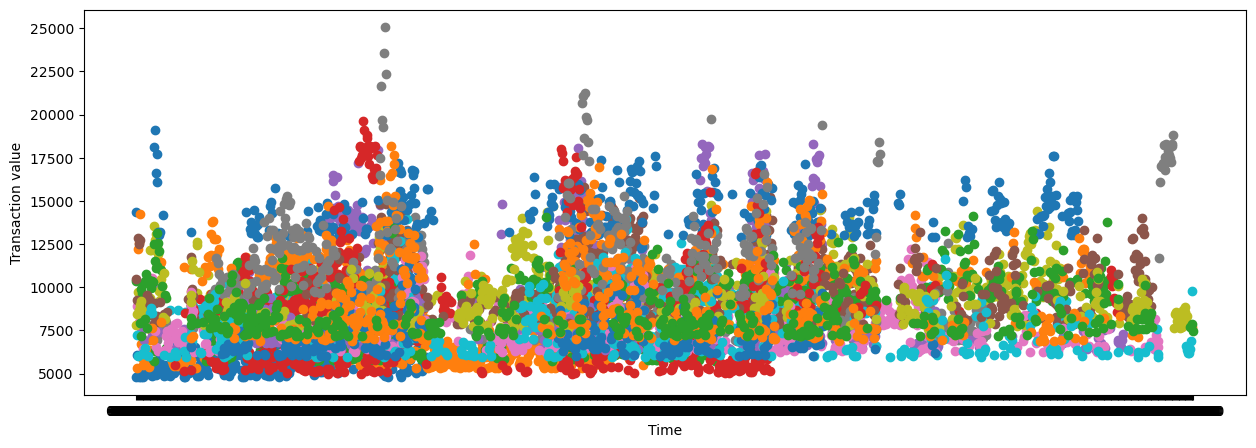

In [11]:
plt.figure(figsize = (15, 5))

for df in data:
    giamua = df.iloc[:,:30]
    giaban = df.iloc[:,30:60]
    klmua = df.iloc[:,61:91]
    klban = df.iloc[:,91:121]

    giamua1 = np.asarray(giamua)
    klmua1 = np.asarray(klmua)
    klban1 = np.asarray(klban)
    giaban1 = np.asarray(giaban)
    temp = (giamua1).dot(klmua1.T)
    temp1 = (giaban1).dot(klban1.T)
    
    mua = []
    ban = []
    for i in range(len(df)):
        mua.append(temp[i][i]/1000)
        ban.append(temp1[i][i]/1000)

    df['tong_tien_mua'] = np.round(mua)
    df['tong_tien_ban'] = np.round(ban)
    df['gia_tri_giao_dich'] = df['tong_tien_mua'] + df['tong_tien_ban']
    q3 = np.quantile(df.gia_tri_giao_dich,0.75)
    df_q3 = df[df.gia_tri_giao_dich > q3]
    df_q3
    
    time1 = []
    for i in df_q3.index:
        time1.append(i.strftime("%H:%M:%S"))


    plt.scatter(x= time1, y =df_q3["gia_tri_giao_dich"])
plt.ylabel('Transaction value')
plt.xlabel('Time')
plt.show()

With such a distribution, we cannot conclude that there is a specific time during the day when the market is active. We will continue to examine with a weekly chart to see if there are any patterns.

## Plotting Barchart with "tong_giao_dich" feature by days of the week

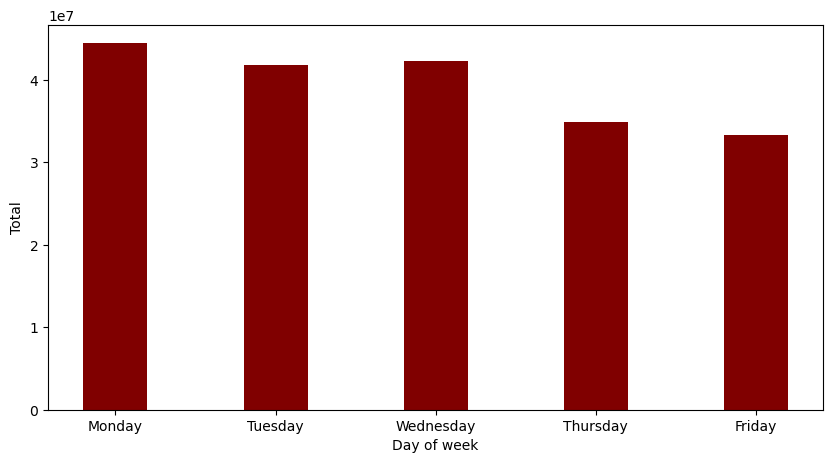

In [12]:
Monday = []
Tuesday = []
Wednesday = []
Thursday = []
Friday = []

for df in data:
    giamua = df.iloc[:,:30]
    giaban = df.iloc[:,30:60]
    klmua = df.iloc[:,61:91]
    klban = df.iloc[:,91:121]

    giamua1 = np.asarray(giamua)
    klmua1 = np.asarray(klmua)
    klban1 = np.asarray(klban)
    giaban1 = np.asarray(giaban)
    temp = (giamua1).dot(klmua1.T)
    temp1 = (giaban1).dot(klban1.T)

    mua = []
    ban = []
    for i in range(len(df)):
        mua.append(temp[i][i]/1000)
        ban.append(temp1[i][i]/1000)

    df['tong_tien_mua'] = np.round(mua)
    df['tong_tien_ban'] = np.round(ban)
    df['tong_gd'] = df['tong_tien_mua'] + df['tong_tien_ban']

    tong = sum(df['tong_gd'])

    if df.index[0].day_name() == "Monday":
        Monday.append(tong)
    if df.index[0].day_name() == "Tuesday":
        Tuesday.append(tong)
    if df.index[0].day_name() == "Wednesday":
        Wednesday.append(tong)
    if df.index[0].day_name() == "Thursday":
        Thursday.append(tong)
    if df.index[0].day_name() == "Friday":
        Friday.append(tong)

week_day = {
    'Monday': sum(Monday),
    'Tuesday': sum(Tuesday),
    'Wednesday': sum(Wednesday),
    'Thursday': sum(Thursday),
    'Friday': sum(Friday)
}

fig = plt.figure(figsize = (10, 5))
plt.bar(list(week_day.keys()), list(week_day.values()), color ='maroon', width = 0.4)
plt.ylabel('Total')
plt.xlabel('Day of week')
plt.show()

It seems that the market will be more active at the beginning of the week, which will help us know when to buy or sell.

### Clustering with K-means algorithm

Next, we will cluster to see which stocks are getting more or less attention.

In [13]:
#get list transaction value
gia_tri_giao_dich=[]
for thing in range(0,30):
    gia_tri_giao_dich.append(round(sum(df1.iloc[:,thing] *df1.iloc[:,thing+61])/1000)) #milions

In [14]:
#get list total value
tong_kl_gd=[]
for thing in range(61,91):
    tong_kl_gd.append(round(sum(df1.iloc[:,thing])))

In [15]:
#Create dataframe include 3 columns: MaGD, GTriGD, TongKLGD
features = df1.iloc[:,0:30].columns
features = [i[-3:] for i in features]
features= list(features)
dict = {
    "MaGD" : features,
    "GTriGD": gia_tri_giao_dich,
    "TongKLGD": tong_kl_gd,
};

df_fit=pd.DataFrame(dict)
df_fit

MaGD  GTriGD  TongKLGD
0   ACB  148335   6166315
1   BCM    1263     15591
2   BID    6603    145118
3   BVH    2969     60096
4   CTG   27577    971960
5   FPT   60827    777706
6   GAS   13260    128436
7   GVR   21794   1499195
8   HDB   45330   2541481
9   HPG  585023  28913663
10  MBB  288878  16631624
11  MSN   39536    490379
12  MWG   69842   1819010
13  NVL  311961  27772301
14  PDR   46890   3967210
15  PLX   11294    316738
16  POW  274425  20991584
17  SAB    2760     14589
18  SSI  413829  20862050
19  STB  388145  15830288
20  TCB  104831   3974644
21  TPB   79896   3590438
22  VCB   34423    390252
23  VHM   28670    656428
24  VIB   82056   3926327
25  VIC   67590   1304910
26  VJC    3108     29653
27  VNM  122647   1649295
28  VPB  353625  18191997
29  VRE   23869    839846

In [16]:
#KMeans Model
var_list =df_fit[["GTriGD","TongKLGD"]]
kmeans = KMeans(n_clusters=4, max_iter=30)
kmeans.fit(var_list)

KMeans(max_iter=30, n_clusters=4)

In [17]:
#get label
kmeans.labels_

array([3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 2, 3, 0, 1, 0, 1, 1, 3, 3,
       0, 0, 3, 0, 0, 0, 1, 0])

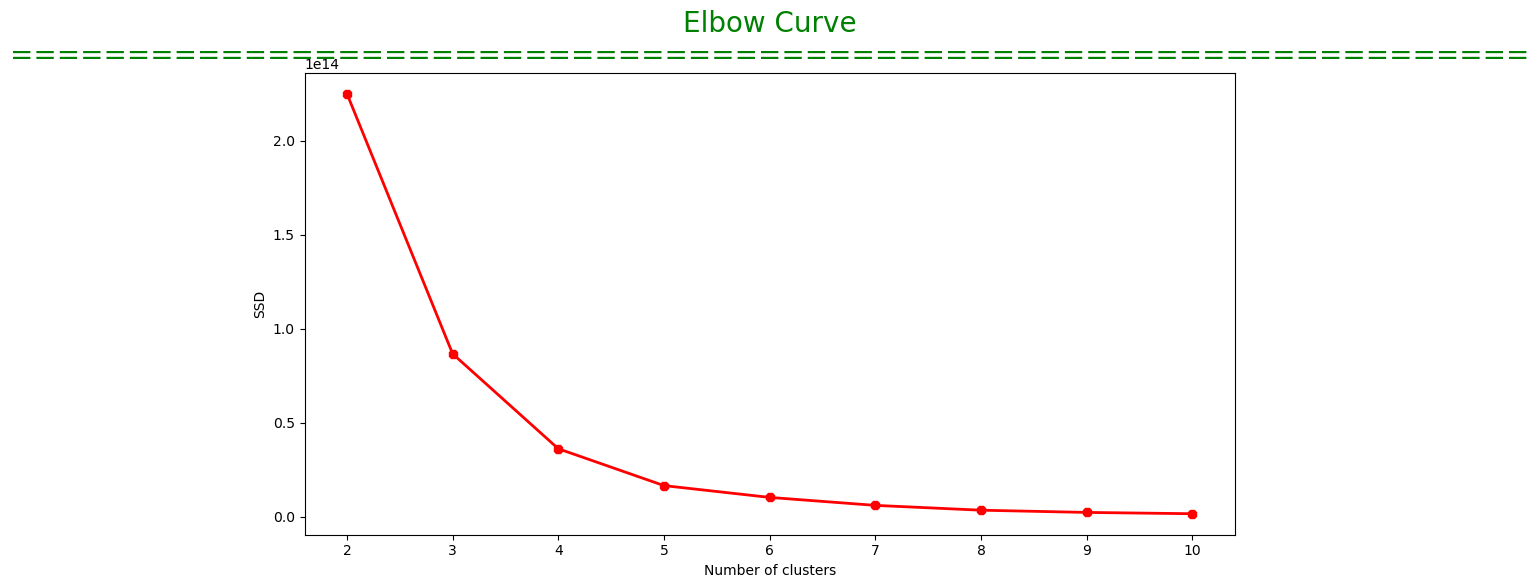

In [18]:
#Plot elbow method by sum of square distance 
ssd = []

for num_clusters in range(2,11):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=30)
    kmeans.fit(var_list)
    ssd.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))

plt.plot(range(2,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("Number of clusters")
plt.xticks(np.arange(2,11,1))
plt.ylabel("SSD")

plt.show()

In [19]:
#add columns label to dataframe 
kmeans = KMeans(n_clusters=4, max_iter=30)
kmeans.fit(var_list)
df_fit["Label"] = kmeans.labels_
df_fit.head()

MaGD  GTriGD  TongKLGD  Label
0  ACB  148335   6166315      3
1  BCM    1263     15591      0
2  BID    6603    145118      0
3  BVH    2969     60096      0
4  CTG   27577    971960      0

#### Hover the mouse pointer over the chart to see details about the stock.

In [20]:
#Transaction value
fig = px.scatter(data_frame = df_fit,  x='GTriGD', y='TongKLGD', color='Label', hover_data=["MaGD"])
fig.show()

With the horizontal axis being the transaction amount of that stock and the vertical axis being the trading volume, for stocks with the same trading volume, the higher the transaction value, the higher the price of the stock. From this, we can determine which group of stocks is experiencing strong increases or decreases in the market. As we can see from the graph, HPG is getting a lot of attention, so we can use various methods such as linear regression or RNN to predict the price of this stock.

### Applying Lasso regression method with 30 sale stock values to predict matching orders price

Since the buying and selling prices are linearly correlated, we will mainly analyze the buying prices to avoid data duplication.

In [21]:
#choose 30 stock values
df_mua_1 = data[0].iloc[:,:30]
df_mua_1 = pd.concat([df_mua_1, data[0]["Gia KL"]],axis=1)

In [22]:
# Get correlation
df_mua_1.corr()

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  \
mua_gia_1ACB      1.000000      0.535573      0.711111      0.778694   
mua_gia_1BCM      0.535573      1.000000      0.597151      0.699544   
mua_gia_1BID      0.711111      0.597151      1.000000      0.673873   
mua_gia_1BVH      0.778694      0.699544      0.673873      1.000000   
mua_gia_1CTG      0.419489      0.453302      0.435222      0.543912   
mua_gia_1FPT      0.766065      0.722110      0.743579      0.894749   
mua_gia_1GAS      0.769004      0.618767      0.840200      0.689372   
mua_gia_1GVR      0.709292      0.607630      0.665183      0.770559   
mua_gia_1HDB      0.309201      0.308093      0.279951      0.380421   
mua_gia_1HPG      0.584129      0.665533      0.622932      0.692625   
mua_gia_1MBB      0.877600      0.697535      0.783428      0.885379   
mua_gia_1MSN      0.819621      0.637795      0.861014      0.859595   
mua_gia_1MWG      0.836048      0.597387      0.694169      0.866711   
mua_gia_1NVL      0.746108      0.827558      0.808084      0.870221   
mua_gia_1PDR      0.885639      0.592177      0.759144      0.818145   
mua_gia_1PLX      0.511815      0.782323      0.574432      0.567646   
mua_gia_1POW      0.270370      0.288040      0.249684      0.367081   
mua_gia_1SAB      0.544288      0.819419      0.622121      0.761628   
mua_gia_1SSI      0.562998      0.539533      0.529528      0.671041   
mua_gia_1STB      0.695200      0.635668      0.642294      0.777115   
mua_gia_1TCB      0.866003      0.635222      0.705824      0.843830   
mua_gia_1TPB      0.782322      0.610880      0.787329      0.895820   
mua_gia_1VCB      0.775791      0.802577      0.805402      0.885988   
mua_gia_1VHM      0.704874      0.844342      0.774596      0.833561   
mua_gia_1VIB      0.688886      0.800011      0.751161      0.777465   
mua_gia_1VIC      0.832404      0.700936      0.837741      0.844537   
mua_gia_1VJC      0.770035      0.745799      0.799994      0.881044   
mua_gia_1VNM      0.714603      0.069407      0.524102      0.445171   
mua_gia_1VPB      0.458716      0.006237      0.152668      0.282957   
mua_gia_1VRE      0.823868      0.614170      0.853227      0.754801   
Gia KL            0.851089      0.772076      0.820155      0.909095   

              mua_gia_1CTG  mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  \
mua_gia_1ACB      0.419489      0.766065      0.769004      0.709292   
mua_gia_1BCM      0.453302      0.722110      0.618767      0.607630   
mua_gia_1BID      0.435222      0.743579      0.840200      0.665183   
mua_gia_1BVH      0.543912      0.894749      0.689372      0.770559   
mua_gia_1CTG      1.000000      0.558201      0.398629      0.904000   
mua_gia_1FPT      0.558201      1.000000      0.760400      0.791978   
mua_gia_1GAS      0.398629      0.760400      1.000000      0.652126   
mua_gia_1GVR      0.904000      0.791978      0.652126      1.000000   
mua_gia_1HDB      0.957031      0.360533      0.259248      0.810538   
mua_gia_1HPG      0.927324      0.693106      0.593580      0.942099   
mua_gia_1MBB      0.477163      0.874837      0.830383      0.761743   
mua_gia_1MSN      0.497156      0.906351      0.877009      0.764515   
mua_gia_1MWG      0.497986      0.919760      0.751147      0.764695   
mua_gia_1NVL      0.541348      0.886864      0.795666      0.767072   
mua_gia_1PDR      0.415959      0.737474      0.805711      0.708631   
mua_gia_1PLX      0.436640      0.621469      0.559270      0.559542   
mua_gia_1POW      0.962543      0.372686      0.220650      0.807298   
mua_gia_1SAB      0.524624      0.830093      0.578858      0.670666   
mua_gia_1SSI      0.951791      0.636929      0.494064      0.943745   
mua_gia_1STB      0.910553      0.766993      0.648166      0.975701   
mua_gia_1TCB      0.461589      0.815653      0.756624      0.745680   
mua_gia_1TPB      0.517614      0.888312      0.787728      0.772495   
mua_gia_1VCB      0.553165      0.943278      0.83746

We can see from the correlation matrix that there are some stock codes that have very high correlations with each other, such as TPB & ACB = 0.88,... There are also stocks that have negative or no correlations with each other. As there are many stocks with high correlation, we will try to use Lasso regression to predict KL price, which is the overall price of the 30 stocks as well as the VN30 index.

In [23]:
#get data
y = df_mua_1["Gia KL"].values
features = df_mua_1.columns[:30]
X = df_mua_1[features].values

y = y.reshape(-1,1)

sc_x = StandardScaler()
sc_x.fit(X)
X = sc_x.transform(X)
sc_y = StandardScaler()
sc_y.fit(y)
y = sc_y.transform(y)



## Lasso Regression Regression
lasso_rgs = Lasso(alpha=0.3)
lasso_rgs.fit(X, y)

# Predicting Test Set
y_pred = lasso_rgs.predict(X)

mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2 = metrics.r2_score(y, y_pred)

results1 = pd.DataFrame([['Multiple Lasso Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results1

Model       MAE       MSE      RMSE  R2 Score
0  Multiple Lasso Regression  0.292311  0.123396  0.351278  0.876604

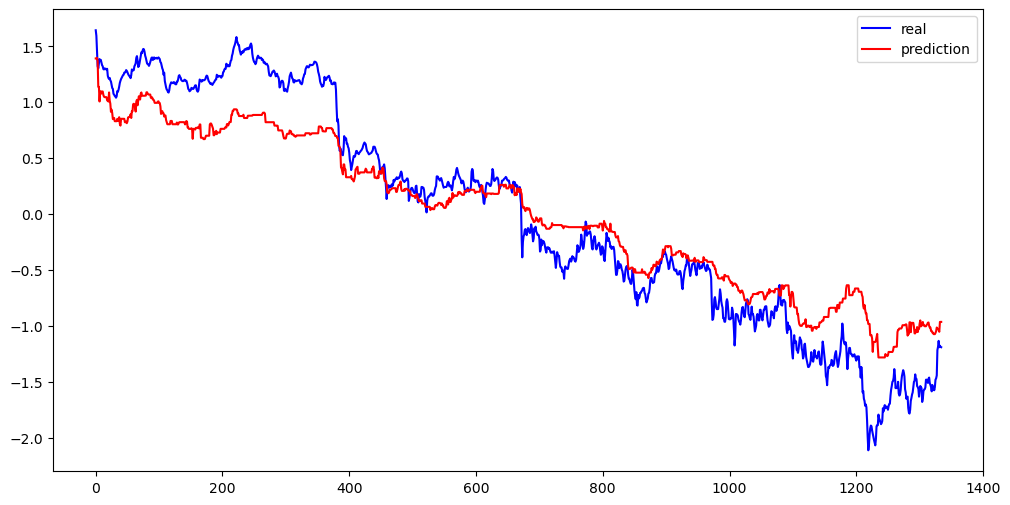

In [24]:
#show prediction
plt.figure(figsize=(12,6))

y_pred = lasso_rgs.predict(X)
y = np.asarray(y)

plt.plot(y, color = "blue",label = "real")
plt.plot(y_pred, color = "red", label = "prediction")
plt.legend()
plt.show()

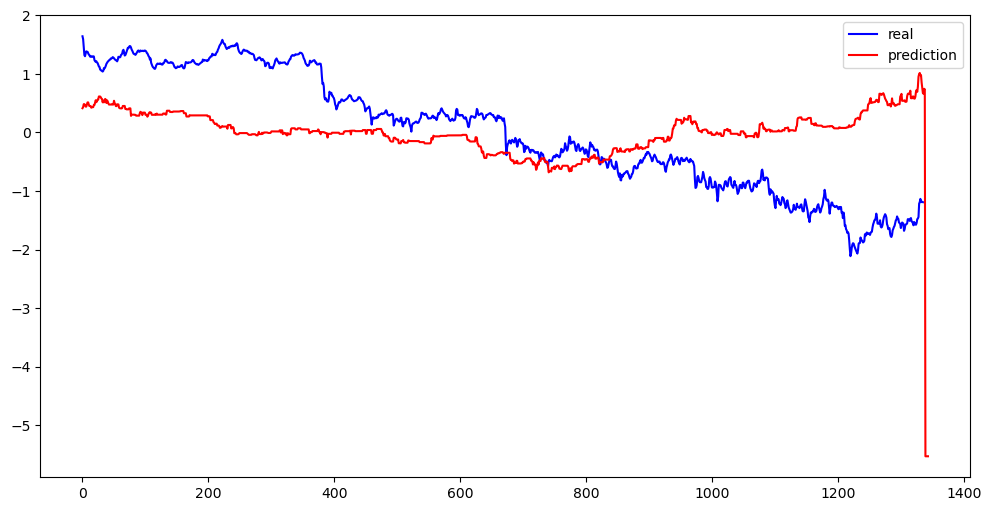

In [25]:
#show prediction
df_mua_2 = data[1].iloc[:,:30]
df_mua_2 = pd.concat([df_mua_2, data[1]["Gia KL"]],axis=1)

y2 = df_mua_2["Gia KL"].values
X2 = df_mua_2[features].values

y2 = y.reshape(-1,1)

sc_x = StandardScaler()
sc_x.fit(X2)
X2 = sc_x.transform(X2)
sc_y = StandardScaler()
sc_y.fit(y2)
y2 = sc_y.transform(y2)

plt.figure(figsize=(12,6))

# Predicting Test Set
y_pred2 = lasso_rgs.predict(X2)
y2 = np.asarray(y2)


plt.plot(y2, color = "blue",label = "real")
plt.plot(y_pred2, color = "red", label = "prediction")
plt.legend()
plt.show()

We train model by dataset of the first day. Comparing the predicted prices of the model on the second day with the actual price of the second day. We can see that the model predicted relatively well in the beginning but was not accurate at the end of the day. This mean the day after will be relative to the day before in the beginning but at the end is not.

### Applying RNN algorithm to predict matching orders price

Let's try predicting matching orders price using a different method, RNN.

In [26]:
df =pd.DataFrame()
df["giakl"] =data[0]["Gia KL"]

In [27]:
df

giakl
_time                                 
2023-03-20 02:17:00+00:00  1037.400000
2023-03-20 02:17:10+00:00  1037.140000
2023-03-20 02:17:20+00:00  1036.450000
2023-03-20 02:17:30+00:00  1035.700000
2023-03-20 02:17:40+00:00  1035.600000
...                                ...
2023-03-20 07:30:10+00:00  1022.733333
2023-03-20 07:30:20+00:00  1022.433333
2023-03-20 07:30:40+00:00  1022.500000
2023-03-20 07:30:50+00:00  1022.450000
2023-03-20 07:31:00+00:00  1022.433333

[1335 rows x 1 columns]

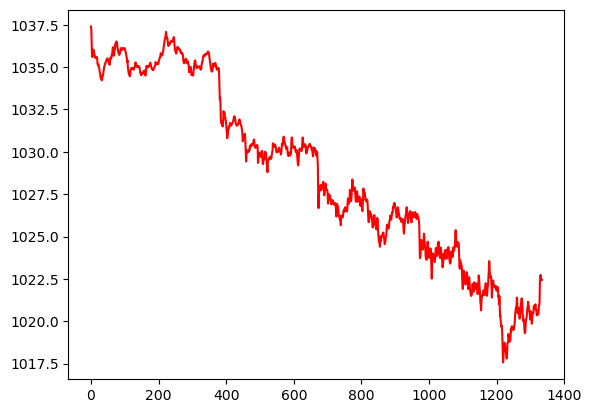

In [28]:
time = list(range(len(df)))
plt.figure()
plt.plot(time ,df['giakl'], color='red', label='kl')
plt.show()

In [29]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['giakl'] = min_max_scaler.fit_transform(df.giakl.values.reshape(-1,1))
    return df

In [30]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
def load_data(stock, seq_len):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [31]:
df_stock = df.copy()
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

In [32]:
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1051, 19, 1)
y_train.shape =  (1051, 1)
x_valid.shape =  (132, 19, 1)
y_valid.shape =  (132, 1)
x_test.shape =  (132, 19, 1)
y_test.shape =  (132, 1)


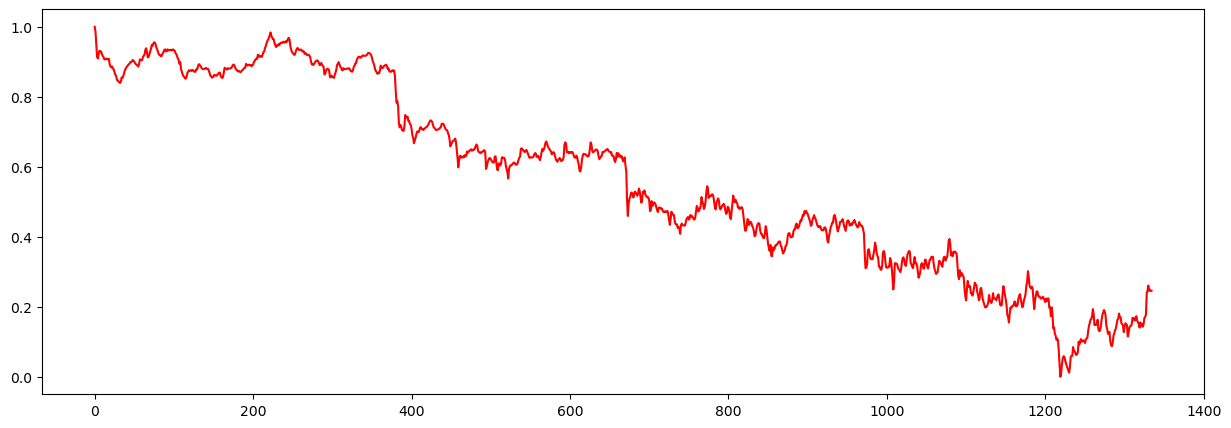

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(df_stock_norm.giakl.values, color='red', label='open')
plt.show()

In [34]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 6s 23ms/step - loss: 0.0733
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 0.0106
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0065
Epoch 4/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0056
Epoch 5/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0056
Epoch 6/100
33/33 [==============================] - 1s 21ms/step - loss: 0.0062
Epoch 7/100
33/33 [==============================] - 1s 30ms/step - loss: 0.0057
Epoch 8/100
33/33 [==============================] - 1s 25ms/step - loss: 0.0046
Epoch 9/100
33/33 [==============================] - 1s 23ms/step - loss: 0.0056
Epoch 10/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0045
Epoch 11/100
33/33 [==============================] - 1s 24ms/step - loss: 0.0044
Epoch 12/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0044
Epoch 13/100
33/33 [=====

In [35]:
prediction = regressor.predict(x_train) 
MSE_scaled = mean_squared_error(y_train, prediction)
rmse = np.sqrt(mean_squared_error(y_train, prediction))
mae =mean_absolute_error(y_train, prediction)
r2 = r2_score(y_train, prediction)
model_results = pd.DataFrame([['RNN',mae,MSE_scaled,rmse,r2]],
                            columns =['Model','MAE','MSE','RMSE','R2 Score'])
model_results

33/33 [==============================] - 1s 8ms/step


Model       MAE       MSE      RMSE  R2 Score
0   RNN  0.027133  0.001057  0.032511  0.975827

In [36]:
y_train.shape
y_train_pred= regressor.predict(x_train)
y_valid_pred = regressor.predict(x_valid)
y_test_pred =  regressor.predict(x_test)

5/5 [==============================] - 0s 8ms/step


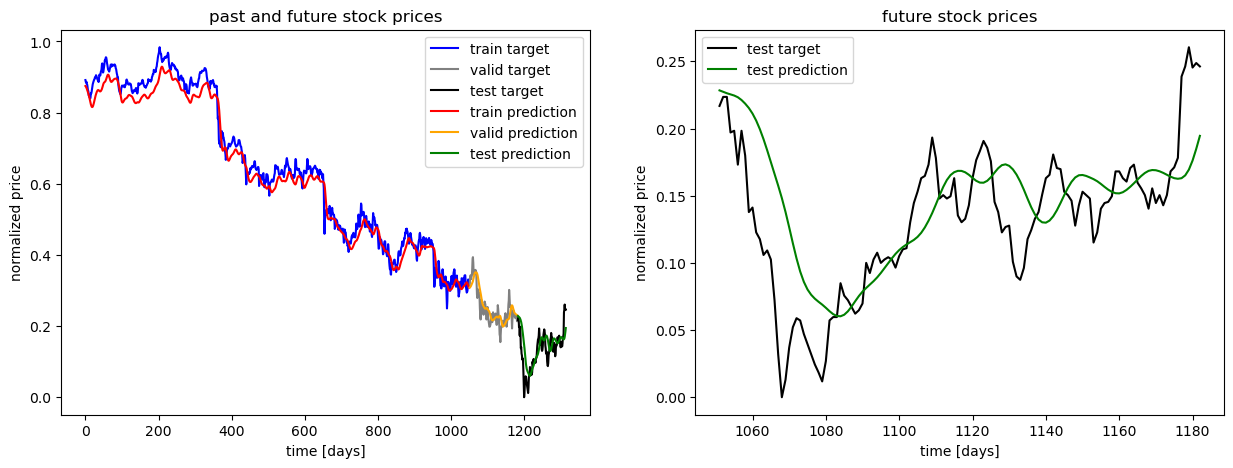

In [37]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowes=t

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');


With training on about 80% of the early day data, RNN accurately predicted the KL index price chart at the end of the day. Therefore, we can use RNN for more specific predictions of selected stocks chosen from the previous clustering.

### Applying PCA method to buying price

Let's try using principal component analysis with the buying price.

In [38]:
# Get first 30 columns
df_mua_1 = data[2].iloc[:,:30]

# Append "Gia KL" column to df_mua_1
df_mua_1 = pd.concat([df_mua_1, data[2]["Gia KL"]],axis=1)

#Get shape
N, d = df_mua_1.shape

print("Num. samples: ", N)
print("Num. features/variables: ", d)
df_mua_1.head()

Num. samples:  1000
Num. features/variables:  31


mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  \
_time                                                                 
2023-03-22 02:24:30+00:00     24.200000          81.0       45.6500   
2023-03-22 02:24:40+00:00     24.280000          81.0       45.6500   
2023-03-22 02:24:50+00:00     24.200000          81.0       45.7000   
2023-03-22 02:25:00+00:00     24.166667          81.0       45.7375   
2023-03-22 02:25:10+00:00     24.150000          81.0       45.7500   

                           mua_gia_1BVH  mua_gia_1CTG  mua_gia_1FPT  \
_time                                                                 
2023-03-22 02:24:30+00:00         49.05     28.350000       78.0875   
2023-03-22 02:24:40+00:00         49.05     28.333333       78.0875   
2023-03-22 02:24:50+00:00         49.05     28.350000       78.1000   
2023-03-22 02:25:00+00:00         49.05     28.350000       78.1000   
2023-03-22 02:25:10+00:00         49.05     28.350000       78.1000   

                           mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  \
_time                                                                 
2023-03-22 02:24:30+00:00         103.2     14.544444         17.55   
2023-03-22 02:24:40+00:00         103.2     14.544444         17.55   
2023-03-22 02:24:50+00:00         103.2     14.500000         17.55   
2023-03-22 02:25:00+00:00         103.2     14.500000         17.55   
2023-03-22 02:25:10+00:00         103.2     14.500000         17.55   

                           mua_gia_1HPG  ...  mua_gia_1TPB  mua_gia_1VCB  \
_time                                    ...                               
2023-03-22 02:24:30+00:00     20.500000  ...     21.750000     86.900000   
2023-03-22 02:24:40+00:00     20.455357  ...     21.750000     86.988889   
2023-03-22 02:24:50+00:00     20.450000  ...     21.792857     87.400000   
2023-03-22 02:25:00+00:00     20.450000  ...     21.800000     87.400000   
2023-03-22 02:25:10+00:00     20.450000  ...     21.800000     87.400000   

                           mua_gia_1VHM  mua_gia_1VIB  mua_gia_1VIC  \
_time                                                                 
2023-03-22 02:24:30+00:00        46.100     20.764286     52.100000   
2023-03-22 02:24:40+00:00        46.200     20.764286     52.135714   
2023-03-22 02:24:50+00:00        46.342     20.750000     52.250000   
2023-03-22 02:25:00+00:00        46.430     20.750000     52.300000   
2023-03-22 02:25:10+00:00        46.450     20.750000     52.300000   

                           mua_gia_1VJC  mua_gia_1VNM  mua_gia_1VPB  \
_time                                                                 
2023-03-22 02:24:30+00:00         103.1     74.400000     20.500000   
2023-03-22 02:24:40+00:00         103.1     74.494118     20.543421   
2023-03-22 02:24:50+00:00         103.1     74.544444     20.513462   
2023-03-22 02:25:00+00:00         103.1     74.600000     20.500000   
2023-03-22 02:25:10+00:00         103.1     74.600000     20.500000   

                           mua_gia_1VRE       Gia KL  
_time                                                 
2023-03-22 02:24:30+00:00     28.950000  1033.510000  
2023-03-22 02:24:40+00:00     28.957692  1033.584375  
2023-03-22 02:24:50+00:00     29.022222  1033.555319  
2023-03-22 02:25:00+00:00     29.000000  1033.483333  
2023-03-22 02:25:10+00:00     29.000000  1033.566667  

[5 rows x 31 columns]

##### Correlations

In [39]:
# Get correlation
df_mua_1.corr()

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  \
mua_gia_1ACB      1.000000      0.025633      0.006983      0.054421   
mua_gia_1BCM      0.025633      1.000000     -0.509232      0.662456   
mua_gia_1BID      0.006983     -0.509232      1.000000     -0.430472   
mua_gia_1BVH      0.054421      0.662456     -0.430472      1.000000   
mua_gia_1CTG      0.105020     -0.612632      0.514797     -0.463154   
mua_gia_1FPT      0.008760      0.292764      0.030281      0.159510   
mua_gia_1GAS     -0.001355      0.756180     -0.406591      0.748169   
mua_gia_1GVR      0.064386      0.189340      0.217364      0.068112   
mua_gia_1HDB      0.003145     -0.542238      0.503017     -0.141714   
mua_gia_1HPG      0.095026      0.702939     -0.338171      0.484590   
mua_gia_1MBB      0.119524      0.169275      0.493118     -0.042082   
mua_gia_1MSN      0.010602      0.126369     -0.119089      0.552965   
mua_gia_1MWG      0.057137      0.027607      0.332124     -0.046821   
mua_gia_1NVL     -0.044365      0.310565     -0.101682      0.298217   
mua_gia_1PDR      0.081200     -0.778100      0.643024     -0.607836   
mua_gia_1PLX     -0.012504      0.584319     -0.405991      0.696160   
mua_gia_1POW      0.118496      0.399940      0.160684      0.374575   
mua_gia_1SAB     -0.005654      0.504431     -0.344068      0.566244   
mua_gia_1SSI      0.114006      0.161566      0.094210     -0.019947   
mua_gia_1STB      0.033900     -0.817918      0.727991     -0.670678   
mua_gia_1TCB      0.123925      0.464579      0.008208      0.423700   
mua_gia_1TPB      0.033212     -0.566164      0.425370     -0.430796   
mua_gia_1VCB     -0.011040     -0.674218      0.304961     -0.376711   
mua_gia_1VHM     -0.003824     -0.558047      0.290038     -0.627006   
mua_gia_1VIB     -0.013754      0.622596     -0.079565      0.503512   
mua_gia_1VIC      0.003252      0.317764     -0.168870      0.044074   
mua_gia_1VJC     -0.078128     -0.631871      0.345673     -0.180901   
mua_gia_1VNM      0.086480     -0.131423      0.499397      0.160893   
mua_gia_1VPB      0.063830     -0.590112      0.631694     -0.718842   
mua_gia_1VRE     -0.024206     -0.636828      0.396462     -0.600710   
Gia KL            0.090964     -0.509465      0.762472     -0.465673   

              mua_gia_1CTG  mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  \
mua_gia_1ACB      0.105020      0.008760     -0.001355      0.064386   
mua_gia_1BCM     -0.612632      0.292764      0.756180      0.189340   
mua_gia_1BID      0.514797      0.030281     -0.406591      0.217364   
mua_gia_1BVH     -0.463154      0.159510      0.748169      0.068112   
mua_gia_1CTG      1.000000     -0.041661     -0.721145      0.293881   
mua_gia_1FPT     -0.041661      1.000000      0.268351      0.385604   
mua_gia_1GAS     -0.721145      0.268351      1.000000      0.044864   
mua_gia_1GVR      0.293881      0.385604      0.044864      1.000000   
mua_gia_1HDB      0.456895     -0.207426     -0.450404     -0.117382   
mua_gia_1HPG     -0.304139      0.252613      0.563714      0.355914   
mua_gia_1MBB      0.163433      0.263378      0.114767      0.580276   
mua_gia_1MSN     -0.285265     -0.022696      0.346069     -0.287969   
mua_gia_1MWG     -0.014948      0.132249      0.198459      0.069630   
mua_gia_1NVL     -0.541334     -0.029059      0.475546     -0.330335   
mua_gia_1PDR      0.821577     -0.174153     -0.778487      0.172220   
mua_gia_1PLX     -0.713526      0.159481      0.830792     -0.202667   
mua_gia_1POW     -0.045024      0.233296      0.441462      0.403087   
mua_gia_1SAB     -0.308603      0.122992      0.373235      0.024300   
mua_gia_1SSI      0.407131      0.222189     -0.100374      0.619574   
mua_gia_1STB      0.746835     -0.210860     -0.754191     -0.020428   
mua_gia_1TCB     -0.059784      0.375139      0.497300      0.544760   
mua_gia_1TPB      0.438464     -0.036580     -0.368134     -0.127314   
mua_gia_1VCB      0.581125     -0.382700     -0.70362

In [40]:
# Drop "Gia KL" column from data
df_mua_1 = df_mua_1.drop("Gia KL",axis = 1)


# Scale data
sc = StandardScaler()
sc_df_mua_1 = sc.fit_transform(df_mua_1)


In [41]:
# Executing PCA method fitting sc_df_mua_1
pca = PCA()
pca.fit(sc_df_mua_1)

# Get variance ratio of components
print("variance ratio of components:")
print(pca.explained_variance_ratio_)
print("\ncumulated variance ratio:")
print(np.cumsum(pca.explained_variance_ratio_))


variance ratio of components:
[0.3581078  0.16915949 0.10881569 0.07277102 0.05001359 0.03609711
 0.03347865 0.02653513 0.02124921 0.01907033 0.01628926 0.0149142
 0.01127966 0.01013232 0.00827002 0.00699116 0.00559533 0.00427395
 0.00405217 0.00390672 0.00343614 0.00265428 0.00237031 0.00231029
 0.00199516 0.00177651 0.00150674 0.00118199 0.00106337 0.00070241]

cumulated variance ratio:
[0.3581078  0.5272673  0.63608299 0.708854   0.7588676  0.79496471
 0.82844336 0.85497849 0.87622769 0.89529803 0.91158729 0.92650148
 0.93778114 0.94791346 0.95618348 0.96317465 0.96876997 0.97304392
 0.97709609 0.98100281 0.98443895 0.98709323 0.98946353 0.99177382
 0.99376898 0.9955455  0.99705224 0.99823423 0.99929759 1.        ]


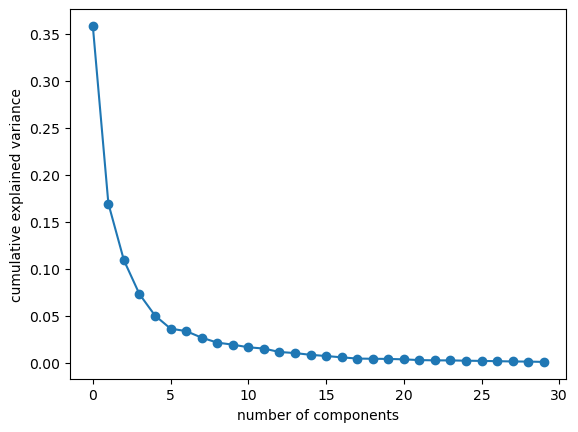

In [42]:
#elbow method
plt.plot(pca.explained_variance_ratio_,marker = "o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


It seems to be 5 components describe $76\%$ of the variance in the dataset

In [43]:
# Executing PCA with 5 PC
pca = PCA(n_components=5)
mua_1_pca = pca.fit_transform(sc_df_mua_1)
mua_1_pca = pd.DataFrame(mua_1_pca,columns = ["PC1","PC2","PC3","PC4","PC5"])
mua_1_pca.head()


PC1       PC2       PC3       PC4       PC5
0  7.892422  1.371922  2.038675  0.949952 -0.602339
1  7.462859  1.333661  2.604685  0.931219 -0.451541
2  6.883911  1.750656  2.750345  0.882135  0.242055
3  6.650028  1.383134  3.037393  0.916773  0.503644
4  6.590873  1.354289  3.071710  0.907995  0.544067

In [44]:
# Get correlations
round(mua_1_pca.corr(),3)

PC1  PC2  PC3  PC4  PC5
PC1  1.0 -0.0 -0.0 -0.0 -0.0
PC2 -0.0  1.0 -0.0  0.0  0.0
PC3 -0.0 -0.0  1.0 -0.0 -0.0
PC4 -0.0  0.0 -0.0  1.0  0.0
PC5 -0.0  0.0 -0.0  0.0  1.0

Loadings

In [45]:
# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', "PC3", "PC4", "PC5"], index=df_mua_1.columns)
loading_matrix

PC1       PC2       PC3       PC4       PC5
mua_gia_1ACB  0.005729 -0.150007  0.073463  0.062034 -0.021859
mua_gia_1BCM  0.887671 -0.110498 -0.162591  0.177637  0.007588
mua_gia_1BID -0.559455 -0.410195  0.504696 -0.121639  0.208678
mua_gia_1BVH  0.757753  0.141973  0.248330  0.435352 -0.033666
mua_gia_1CTG -0.766702 -0.413104  0.053421  0.213090 -0.076644
mua_gia_1FPT  0.293921 -0.348431  0.055566  0.108648  0.023126
mua_gia_1GAS  0.924184  0.035078  0.199572 -0.003044  0.127999
mua_gia_1GVR  0.092623 -0.787113 -0.004007  0.276838 -0.172478
mua_gia_1HDB -0.557091  0.134861  0.585025  0.168225 -0.348435
mua_gia_1HPG  0.679822 -0.439780 -0.208236  0.142827  0.038613
mua_gia_1MBB  0.113670 -0.806102  0.282246 -0.124305  0.017073
mua_gia_1MSN  0.215908  0.561535  0.514437  0.497816  0.199951
mua_gia_1MWG  0.101779 -0.315121  0.290623 -0.311972  0.586675
mua_gia_1NVL  0.420775  0.286987  0.076228 -0.171886  0.690389
mua_gia_1PDR -0.879840 -0.269189  0.204042  0.085499 -0.095037
mua_gia_1PLX  0.818283  0.296094  0.384674 -0.191784 -0.087856
mua_gia_1POW  0.428066 -0.572577  0.399323  0.065498 -0.002618
mua_gia_1SAB  0.385538  0.278764 -0.003241  0.694770  0.047448
mua_gia_1SSI -0.007910 -0.795552 -0.315283  0.311970  0.026369
mua_gia_1STB -0.894979 -0.165400  0.251742 -0.114189  0.135604
mua_gia_1TCB  0.475977 -0.562722  0.233633  0.240197  0.132165
mua_gia_1TPB -0.547506  0.024699  0.348883 -0.258243  0.223821
mua_gia_1VCB -0.794861  0.261641  0.000698  0.376019  0.244412
mua_gia_1VHM -0.769664 -0.141870 -0.343718  0.276648  0.242920
mua_gia_1VIB  0.651406 -0.445757  0.221632  0.176879  0.018633
mua_gia_1VIC  0.186770 -0.443544 -0.647885  0.142184  0.366704
mua_gia_1VJC -0.662683  0.393035  0.285571  0.464331  0.151693
mua_gia_1VNM -0.016028 -0.347981  0.802846  0.044451 -0.019880
mua_gia_1VPB -0.749505 -0.529598 -0.108347 -0.127369 -0.076908
mua_gia_1VRE -0.857279  0.047448 -0.201268  0.322205  0.177805

We can use biplot to simultaneously identify patterns, clusters, and outliers of data points and the relationships between variables, as well as the contribution of variables to the principal components.

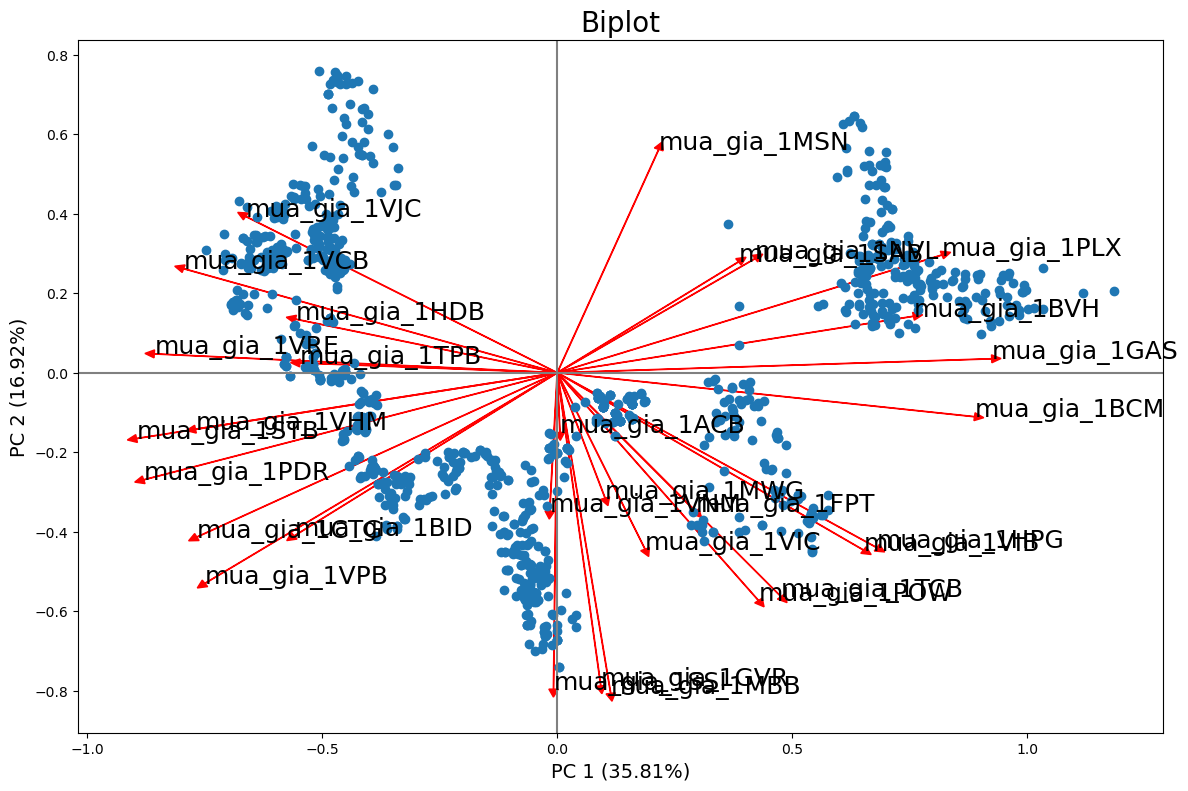

In [46]:
#Biplot

#Get PC1, PC2
PC1 = np.asarray(mua_1_pca.PC1)
PC2 = np.asarray(mua_1_pca.PC2)

#Get features
features = data[2].iloc[:,:30].columns

fig, ax = plt.subplots(figsize=(14, 9))
 
# plot eigenvectors and features name 
for i, feature in enumerate(features):
    ax.arrow(0, 0, loading_matrix.PC1[i], loading_matrix.PC2[i],head_width=0.02, head_length=0.02,color = 'red')
    ax.text(loading_matrix.PC1[i], loading_matrix.PC2[i], feature, fontsize=18)
    
# Plot x = 0, y = 0 axes 
ax.axhline(y=0, color='gray')
ax.axvline(x=0, color='gray')

# Plot PC1, PC2 scatter
ax.scatter(PC1*0.15,PC2*0.15)
 
ax.set_xlabel("PC 1 ({}%)".format(round(pca.explained_variance_ratio_[0]*100,2)),fontsize = 14)
ax.set_ylabel("PC 2 ({}%)".format(round(pca.explained_variance_ratio_[1]*100,2)),fontsize = 14)
ax.set_title('Biplot', fontsize=20)

plt.show()

- The points on the biplot graph represent the data points (observations), where points that are close to each other describe similar measurements. Points that are far away from the principal axes represent outliers. The biplot graph can also show patterns, clusters, and the relationships between variables, as well as the contribution of variables to the principal components. </br>
- The direction of the vectors, corresponding to the coordinate system created by the principal components, reflects the contribution of the corresponding variable to each principal axis. The smaller the angle between each vector and the principal axis, the higher the contribution of the variable to that principal axis.</br>
- The length of a vector represents the variance (variation) of the corresponding variable in the principal component axis system. A vector with a short length means that it can be better represented in another dimension.</br>
- The angle between the vectors in the biplot represents the correlation between the corresponding variables: a small angle indicates a high positive correlation, a right angle indicates no correlation, and a obtuse angle indicates a high negative correlation.</br>

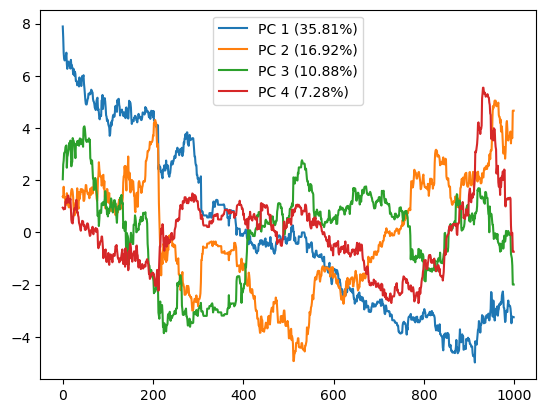

In [47]:
# Plot PC1, PC2, PC3, PC4, PC5 from gia_mua by time series
plt.plot((mua_1_pca.PC1),label = "PC 1 ({}%)".format(round(pca.explained_variance_ratio_[0]*100,2)))
plt.plot((mua_1_pca.PC2),label = "PC 2 ({}%)".format(round(pca.explained_variance_ratio_[1]*100,2)))
plt.plot((mua_1_pca.PC3), label = "PC 3 ({}%)".format(round(pca.explained_variance_ratio_[2]*100,2)))
plt.plot((mua_1_pca.PC4), label = "PC 4 ({}%)".format(round(pca.explained_variance_ratio_[3]*100,2)))
plt.legend()
plt.show()

In [48]:
# 3D visualization
time = list(range(len(mua_1_pca.PC1)))

fig = px.line_3d(x=time, y=mua_1_pca.PC1, z=mua_1_pca.PC2)
fig.update_layout(
    title='', 
    autosize=False,
    width=500, 
    height=500,
    margin={"l":65, "r":50, "b":65, "t":90},
    scene={
        "xaxis_title":'Time',
        "yaxis_title":'PC1',
        "zaxis_title":'PC2',
    },
)
fig.show()


Representing PC1 and PC2 over time axis, we can use a machine learning model to predict the future direction of PC1 and PC2 in 3D space, and vice versa for the stock codes. We have not been able to do it yet

### Applying RNN method

With the idea of using RNN to predict the first principal component and projecting it back to the original space for analysis, we begin implementing RNN for PC1.

In [49]:
# Get PC1
trainset = mua_1_pca.iloc[:,0:1].values

# Scale
sc = StandardScaler()
training_scaled = sc.fit_transform(trainset)

# Get input data
x_train = []
y_train = []
for i in range(60,len(mua_1_pca)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Train data with RNN algorithm
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 20, batch_size = 32)

Epoch 1/20
30/30 [==============================] - 7s 54ms/step - loss: 0.1831
Epoch 2/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0383
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0311
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.0269
Epoch 5/20
30/30 [==============================] - 3s 89ms/step - loss: 0.0237
Epoch 6/20
30/30 [==============================] - 3s 91ms/step - loss: 0.0308
Epoch 7/20
30/30 [==============================] - 3s 85ms/step - loss: 0.0244
Epoch 8/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0230
Epoch 9/20
30/30 [==============================] - 2s 75ms/step - loss: 0.0207
Epoch 10/20
30/30 [==============================] - 3s 96ms/step - loss: 0.0200
Epoch 11/20
30/30 [==============================] - 3s 97ms/step - loss: 0.0186
Epoch 12/20
30/30 [==============================] - 3s 110ms/step - loss: 0.0210
Epoch 13/20
30/30 [=================

In [50]:
# Get testing dataset
x_test = []
for i in range(60,len(mua_1_pca)):
    x_test.append(training_scaled[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Predicting
predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)
predicted.shape

30/30 [==============================] - 1s 17ms/step


(940, 1)

In [51]:
# Get real data
np.asarray(mua_1_pca.PC1.loc[60:]).shape

(940,)

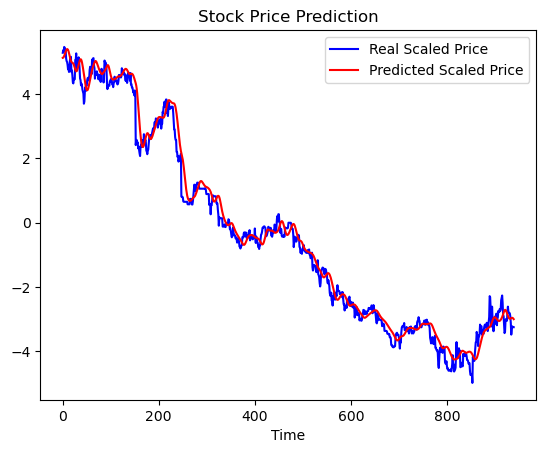

In [52]:
# show predictions
plt.plot(np.asarray(mua_1_pca.PC1.loc[60:]),color = 'blue', label = 'Real Scaled Price')
plt.plot(predicted, color = 'red', label = 'Predicted Scaled Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.legend()
plt.show()

In [53]:
# PCA the day after to test model
df_mua_2 = data[3].iloc[:,:30]

# Scale
sc = StandardScaler()
sc_df_mua_2 = sc.fit_transform(df_mua_2)

# Executing PCA method
pca = PCA(n_components=5)
mua_2_pca = pca.fit_transform(sc_df_mua_2)
mua_2_pca = pd.DataFrame(mua_2_pca,columns = ["PC1","PC2","PC3","PC4","PC5"])

41/41 [==============================] - 1s 18ms/step


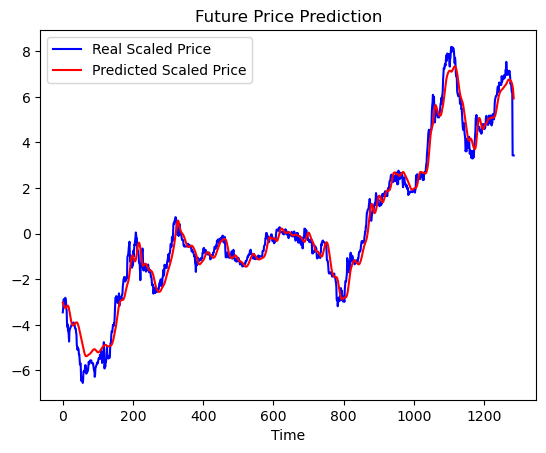

In [54]:
# Get testing dataset
testset = mua_2_pca.iloc[:,0:1].values

# Scale
sc = StandardScaler()
test_scaled = sc.fit_transform(testset)
x_test = []

# Formatting testing dataset
for i in range(60,len(mua_2_pca)):
    x_test.append(test_scaled[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Get prediction
predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)
predicted.shape

# Show prediction
plt.plot(np.asarray(mua_2_pca.PC1.loc[60:]),color = 'blue', label = 'Real Scaled Price')
plt.plot(predicted, color = 'red', label = 'Predicted Scaled Price')
plt.title('Future Price Prediction')
plt.xlabel('Time')
plt.legend()
plt.show()

Thus RNN method can be used to predict the principal components. However, we have not found a way to map them back to the original space and produce results.

# Applying multiple linear regression to principal components

With the idea of using multiple linear regression with each PC from 1 to 4 and using the influence weights of each PC to predict matching orders price.

In [55]:
# Get label and input dataset
y = data[2]["Gia KL"].values
X = mua_1_pca.iloc[:,:3].values

y = y.reshape(-1,1)

# Scale
sc_x =  StandardScaler()
sc_x.fit(X)
X = sc_x.transform(X)

sc_y =  StandardScaler()
sc_y.fit(y)
y = sc_y.transform(y)

## training Linear Regression model
linear_rgs = LinearRegression()
linear_rgs.fit(X, y)

# Predicting Test Set
y_pred = linear_rgs.predict(X)

# Get metrics of the model
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2 = metrics.r2_score(y, y_pred)

results1 = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results1

Model       MAE       MSE     RMSE  R2 Score
0  Multiple Linear Regression  0.305986  0.159664  0.39958  0.840336

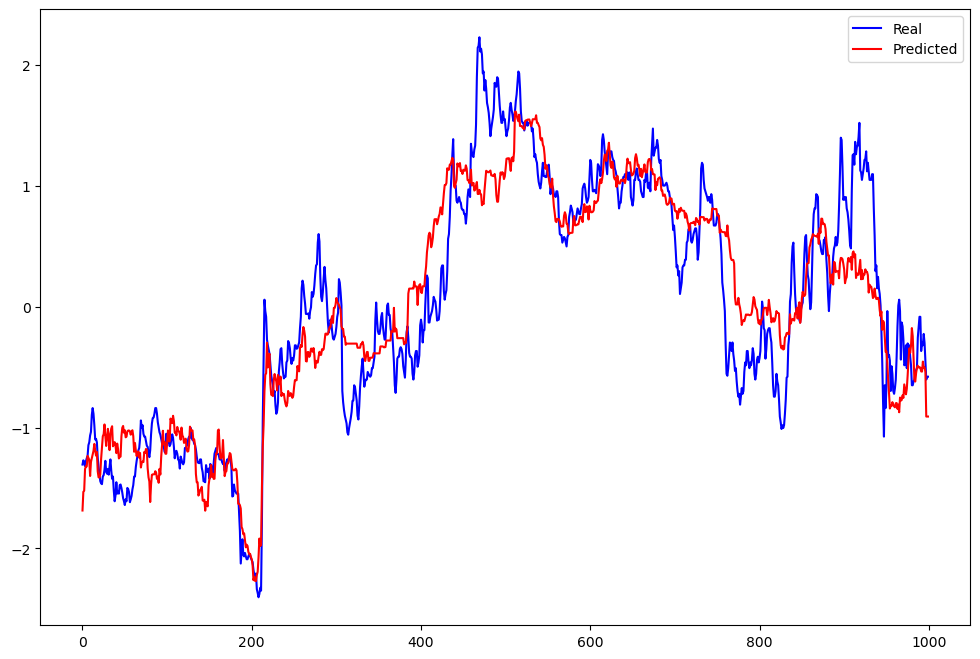

In [56]:
# Show prediction
fig = plt.figure(figsize = (12,8))

plt.plot(y, color = "blue",label = "Real")
plt.plot(y_pred, color = "red",label = "Predicted")
plt.legend()
plt.show()

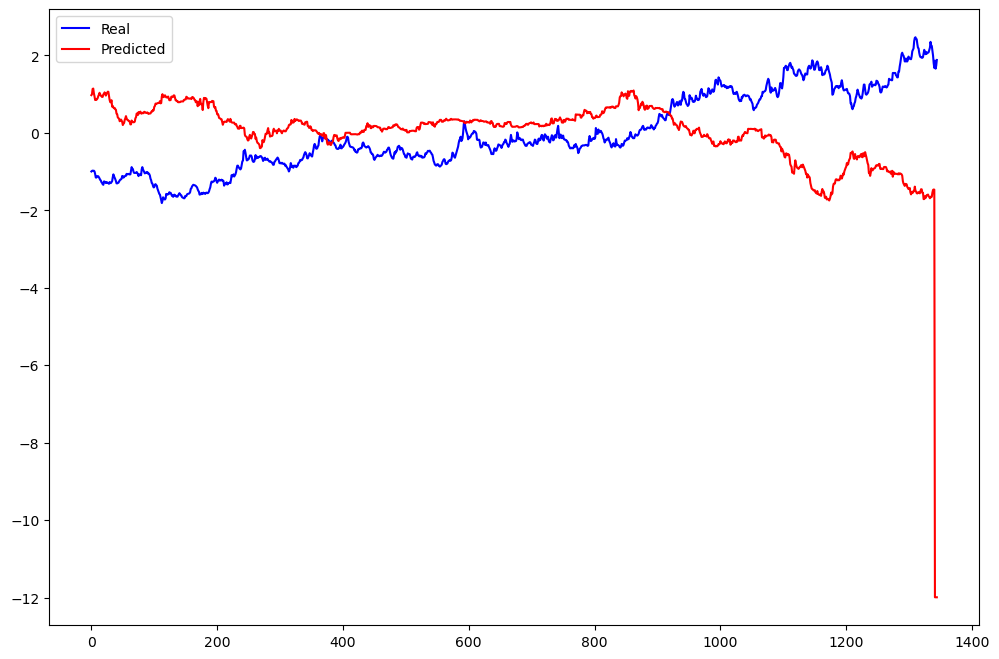

In [57]:
# Test with mua_2_pca
# PCA with the day after to test model
df_mua_2 = data[3].iloc[:,:30]

# Scale
sc = StandardScaler()
sc_df_mua_2 = sc.fit_transform(df_mua_2)

# Executing PCA method
pca = PCA(n_components=5)
mua_2_pca = pca.fit_transform(sc_df_mua_2)
mua_2_pca = pd.DataFrame(mua_2_pca,columns = ["PC1","PC2","PC3","PC4","PC5"])
# PCA day 2 to test model

test_y = data[3]["Gia KL"].values
test_X = mua_2_pca.iloc[:,:3].values

test_y = test_y.reshape(-1,1)

# Scale
sc_x =  StandardScaler()
test_X = sc_x.fit_transform(test_X)
sc_y =  StandardScaler()
test_y = sc_y.fit_transform(test_y)

# Get prediction
test_y_pred = linear_rgs.predict(test_X)

# Show prediction
fig = plt.figure(figsize = (12,8))
plt.plot(test_y, color = "blue",label = "Real")
plt.plot(test_y_pred, color = "red",label = "Predicted")
plt.legend()
plt.show()

It seem to be this method is similar to apply lasso regression method on 30 stock values. Because lasso method using its algorithm to eliminate some features which are not significantly relative to matching orders price. PCA also do that and we just need to apply linear regression on this PCA dataset. We train model by dataset of third day. Comparing the predicted prices of the model on the 4th day with the actual price of the 4th day. We can see that the model predicted relatively well in the beginning but was not accurate at the end of the day.

# Dealing with monthly data

Because the time intervals in the dataset were too small, many volume cells were 0.0, meaning there were no stock transactions at that time point. We have redivided the time intervals into 5-minute periods, with the price being the average price over the 5-minute period and the volume being the total volume of transactions during that period. We also aggregated the data into monthly periods for an overall analysis.

In [58]:
# Get monthly data
df_month = pd.concat([each for each in data])
df_month.shape

df_15min = []
# 30 observations = 5 mins
# An element in df_5min is a dataframe of data in 5 minutes
for i in range(round(df_month.shape[0]/30)):
    df_15min.append(df_month.iloc[i*30:(i+1)*30])
df_15min[-1]


columns = df_15min[0].columns
df_merge = pd.DataFrame(columns = columns)

# Concaternate the elements to a Datafame
for each in df_15min:
    # Gia_mua, gia_ban => Get average price over the 5-minutes
    temp1 = list(round(np.mean(each.iloc[:,0:61],axis = 0),2))
    # klmua, kl_ban => Get sum of 
    temp2 = list(round(np.sum(each.iloc[:,61:],axis = 0),0))
    temp1.extend(temp2)
    df_merge.loc[len(df_merge)] = temp1;
    
df_merge.head(20)

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  mua_gia_1CTG  \
0          24.21         81.11         45.82         49.53         28.72   
1          24.19         81.14         45.83         49.59         28.71   
2          24.24         81.06         45.85         49.74         28.77   
3          24.22         81.00         45.86         49.74         28.75   
4          24.19         81.00         45.79         49.72         28.70   
5          24.18         81.05         45.78         49.72         28.67   
6          24.20         81.10         45.84         49.70         28.77   
7          24.21         81.10         45.84         49.63         28.82   
8          24.26         81.36         45.92         49.67         28.81   
9          24.19         81.41         45.89         49.64         28.74   
10         24.20         81.17         45.88         49.55         28.69   
11         24.30         81.20         45.85         49.50         28.70   
12         24.26         81.20         45.82         49.53         28.69   
13         24.15         81.17         45.66         49.46         28.62   
14         24.12         81.20         45.77         49.45         28.70   
15         24.10         81.20         45.65         49.44         28.60   
16         24.05         81.20         45.62         49.45         28.69   
17         24.05         81.20         45.58         49.45         28.64   
18         24.05         81.20         45.61         49.45         28.64   
19         24.07         81.20         45.71         49.45         28.62   

    mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  mua_gia_1HPG  ...  \
0          78.66        103.77         14.80         18.03         20.35  ...   
1          78.70        103.50         14.74         18.00         20.35  ...   
2          78.71        103.57         14.79         18.04         20.47  ...   
3          78.60        103.54         14.78         18.03         20.45  ...   
4          78.58        103.52         14.75         18.00         20.45  ...   
5          78.50        103.50         14.75         18.02         20.42  ...   
6          78.46        103.51         14.75         18.03         20.43  ...   
7          78.51        103.50         14.78         18.04         20.53  ...   
8          78.50        103.50         14.81         18.05         20.53  ...   
9          78.50        103.50         14.80         18.04         20.55  ...   
10         78.50        103.57         14.77         18.04         20.50  ...   
11         78.50        103.60         14.75         18.05         20.51  ...   
12         78.45        103.57         14.74         18.02         20.49  ...   
13         78.33        103.47         14.62         18.01         20.41  ...   
14         78.35        103.40         14.65         18.10         20.44  ...   
15         78.30        103.34         14.63         18.01         20.43  ...   
16         78.22        103.30         14.60         18.00         20.40  ...   
17         78.26        103.30         14.55         17.98         20.37  ...   
18         78.20        103.30         14.54         18.00         20.40  ...   
19         78.35        103.30         14.56         18.00         20.40  ...   

    ban_kl_2VIB  ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM  ban_kl_2VPB  \
0       47510.0       3785.0        130.0       8622.0     139525.0   
1       56292.0       7658.0        135.0      19695.0     166687.0   
2       59680.0       3003.0        722.0      25378.0      99988.0   
3       78600.0       8410.0       1815.0      12957.0      43480.0   
4      110915.0      11470.0        110.0       6610.0      37100.0   
5       61440.0       7565.0         30.0       5800.0     190437.0   
6       76425.0       7935.0         93.0       4640.0     192225.0   
7       84623.0       9120.0        270.0       8700.0     176093.0   
8       47130.0      10500.0        210.0      10825.0     193170.

Similar analysis can be performed with data within a single day. (cell 13-20)

Caculate price volatility in 5 minutes and aggregate the data into monthly periods for an overall analysis

In [59]:
# Get monthly data
df_month = pd.concat([each for each in data])
df_month.shape

df_5min = []
# 30 observations = 5 mins
# An element in df_5min is a dataframe of data in 5 minutes
for i in range(round(df_month.shape[0]/30)):
    df_5min.append(df_month.iloc[i*30:(i+1)*30,:])


columns = df_5min[0].columns
df_merge_move = pd.DataFrame(columns = columns)

# Concaternate the elements to a Datafame
for each in df_5min:
    # Gia_mua, gia_ban => Get movement by subtracting close price by open price
    temp1 = list(round(np.subtract(each.iloc[-1,0:61],each.iloc[0,0:61])*100/(each.iloc[0,0:61]),3))
    # klmua, kl_ban => Get sum of 
    temp2 = list(round(np.sum(each.iloc[:,61:],axis = 0),0))
    temp1.extend(temp2)
    df_merge_move.loc[len(df_merge_move)] = temp1;

df_merge_move.head(10)

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  mua_gia_1CTG  \
0        -0.207         0.123        -0.218        -0.502        -0.116   
1         0.000         0.000         0.109         0.202         0.174   
2         0.413        -0.123         0.000         0.101         0.000   
3        -0.206         0.000         0.000         0.101         0.000   
4        -0.207         0.000        -0.218        -0.101        -0.174   
5         0.207         0.123         0.055         0.000         0.000   
6         0.000         0.000         0.000         0.000         0.348   
7         0.000         0.000         0.218         0.000        -0.174   
8         0.207         0.370        -0.109         0.000         0.174   
9        -0.412        -0.369        -0.054        -0.201        -0.521   

   mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  mua_gia_1HPG  ...  \
0        -0.506        -0.481        -0.338        -0.826        -0.000  ...   
1         0.254         0.000         0.339         0.000         0.417  ...   
2        -0.127         0.097         0.000         0.093         0.245  ...   
3         0.000        -0.097        -0.338        -0.277         0.000  ...   
4        -0.127         0.000         0.000         0.000         0.000  ...   
5         0.000         0.032         0.000         0.000        -0.244  ...   
6         0.000        -0.097         0.000         0.278         0.490  ...   
7         0.000         0.000         0.339         0.000         0.244  ...   
8         0.000         0.000         0.000         0.000         0.000  ...   
9         0.000         0.000         0.000        -0.277         0.000  ...   

   ban_kl_2VIB  ban_kl_2VIC  ban_kl_2VJC  ban_kl_2VNM  ban_kl_2VPB  \
0      47510.0       3785.0        130.0       8622.0     139525.0   
1      56292.0       7658.0        135.0      19695.0     166687.0   
2      59680.0       3003.0        722.0      25378.0      99988.0   
3      78600.0       8410.0       1815.0      12957.0      43480.0   
4     110915.0      11470.0        110.0       6610.0      37100.0   
5      61440.0       7565.0         30.0       5800.0     190437.0   
6      76425.0       7935.0         93.0       4640.0     192225.0   
7      84623.0       9120.0        270.0       8700.0     176093.0   
8      47130.0      10500.0        210.0      10825.0     193170.0   
9     103420.0       8609.0        993.0      14493.0     303785.0   

   ban_kl_2VRE  tong_tien_mua  tong_tien_ban  gia_tri_giao_dich   tong_gd  
0      17760.0        35613.0        28850.0            64463.0   64463.0  
1       2215.0        45345.0        33350.0            78695.0   78695.0  
2       7617.0        32018.0        26836.0            58854.0   58854.0  
3       4410.0        47065.0        27872.0            74937.0   74937.0  
4       2580.0        50110.0        24192.0            74302.0   74302.0  
5       1070.0        75199.0        27490.0           102689.0  102689.0  
6       5270.0        70272.0        36640.0           106912.0  106912.0  
7       7835.0        52600.0        47077.0            99677.0   99677.0  
8       6938.0        52946.0        41214.0            94160.0   94160.0  
9       5920.0        55159.0        49429.0           104588.0  104588.0  

[10 rows x 185 columns]

We will get buying prices and buying volumes as features for applying PCA and clustering method to figure out the patterns

In [60]:
# Get data to apply PCA method
df_mua=df_merge_move.iloc[:,:30]
df_mua=pd.concat([df_mua, df_merge_move.iloc[:,61:91]],axis=1)
N, d = df_mua.shape
df_mua.corr()

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  \
mua_gia_1ACB      1.000000      0.038234      0.206249      0.219345   
mua_gia_1BCM      0.038234      1.000000      0.072202      0.097841   
mua_gia_1BID      0.206249      0.072202      1.000000      0.050796   
mua_gia_1BVH      0.219345      0.097841      0.050796      1.000000   
mua_gia_1CTG      0.075835      0.130530      0.308388      0.171450   
mua_gia_1FPT      0.989811      0.035327      0.194128      0.217060   
mua_gia_1GAS      0.069733      0.106120      0.153328      0.158653   
mua_gia_1GVR      0.995643      0.044508      0.223323      0.235900   
mua_gia_1HDB      0.113179      0.109347      0.182021      0.139584   
mua_gia_1HPG      0.994051      0.033330      0.211792      0.218130   
mua_gia_1MBB      0.976967      0.035506      0.216111      0.215775   
mua_gia_1MSN      0.194648      0.073855      0.205289      0.081773   
mua_gia_1MWG      0.150013      0.076919      0.146745      0.156194   
mua_gia_1NVL      0.833564      0.023933      0.226492      0.248259   
mua_gia_1PDR      0.160784      0.116556      0.213943      0.206646   
mua_gia_1PLX      0.147561      0.106741      0.101285      0.217675   
mua_gia_1POW      0.984781      0.048411      0.204540      0.214718   
mua_gia_1SAB     -0.028095     -0.040673      0.009105      0.013623   
mua_gia_1SSI      0.874359      0.060716      0.282085      0.264173   
mua_gia_1STB      0.969910      0.050096      0.235690      0.218777   
mua_gia_1TCB      0.236906      0.090036      0.244433      0.216950   
mua_gia_1TPB      0.063792      0.026075      0.201086      0.139472   
mua_gia_1VCB      0.130597      0.068464      0.206525      0.101645   
mua_gia_1VHM     -0.043029      0.128003      0.244796      0.099487   
mua_gia_1VIB      0.217355      0.134776      0.264366      0.143227   
mua_gia_1VIC      0.024190      0.073537      0.126390      0.085174   
mua_gia_1VJC      0.065059      0.058588      0.156538      0.003250   
mua_gia_1VNM      0.998574      0.036673      0.199558      0.219308   
mua_gia_1VPB      0.111693      0.042844      0.140165      0.229122   
mua_gia_1VRE      0.996167      0.041566      0.211320      0.219279   
mua_kl_1ACB      -0.013390     -0.008866      0.006002     -0.033979   
mua_kl_1BCM      -0.010263     -0.005757     -0.032644      0.002933   
mua_kl_1BID      -0.021500     -0.007633      0.016147     -0.028843   
mua_kl_1BVH       0.009738      0.002728     -0.009502      0.005992   
mua_kl_1CTG      -0.017987      0.001003     -0.049787     -0.025591   
mua_kl_1FPT      -0.022776      0.016298     -0.043398     -0.002126   
mua_kl_1GAS      -0.004340      0.002942     -0.035834      0.010930   
mua_kl_1GVR      -0.005411      0.005842     -0.037040     -0.030103   
mua_kl_1HDB       0.013155     -0.001011      0.011424     -0.043661   
mua_kl_1HPG      -0.030548     -0.042496     -0.058857     -0.033580   
mua_kl_1MBB      -0.010304      0.004598     -0.005058     -0.016408   
mua_kl_1MSN      -0.003097      0.017221      0.001926     -0.030968   
mua_kl_1MWG       0.016452      0.009404     -0.011008     -0.001028   
mua_kl_1NVL      -0.028955      0.063816     -0.019665      0.037708   
mua_kl_1PDR      -0.033556      0.013113     -0.084355     -0.023287   
mua_kl_1PLX      -0.046343     -0.020435     -0.018669     -0.055348   
mua_kl_1POW      -0.018903     -0.001909      0.037439     -0.001563   
mua_kl_1SAB      -0.009286      0.030834     -0.011910     -0.023824   
mua_kl_1SSI      -0.031657      0.050651     -0.070609     -0.014941   
mua_kl_1STB      -0.130957      0.004616     -0.011562     -0.031545   
mua_kl_1TCB      -0.006488      0.005696     -0.047126      0.016256   
mua_kl_1TPB      -0.025070     -0.017431     -0.041547     -0.012829   
mua_kl_1VCB      -0.005698      0.018181     -0.101312      0.003721   
mua_kl_1VHM      -0.005225      0.048273     -0.036126      0.051500   
mua_kl_1VIB       0.013424      0.054782     -0.003469

In [61]:
# Scale
sc = StandardScaler()
sc_df_mua = sc.fit_transform(df_mua)
sc_df_mua.shape

(1018, 60)

Perform PCA with the entire month's data, including the trading volume portion for each stock. This was not previously possible when the volume columns had many 0.0 values.

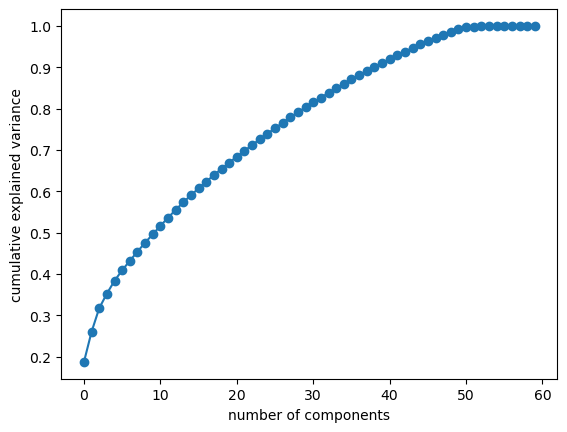

In [62]:
pca = PCA()
pca.fit(sc_df_mua)

plt.plot(np.cumsum(pca.explained_variance_ratio_),marker = "o")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [63]:
pca = PCA(n_components=20)
df_mua_pca = pca.fit_transform(sc_df_mua)
df_mua_pca = pd.DataFrame(df_mua_pca)
# Get correlations
np.round(df_mua_pca.corr(),3)
round(df_mua_pca.corr(),1)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   1.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0   
1  -0.0  1.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0   
2  -0.0 -0.0  1.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0   
3   0.0  0.0 -0.0  1.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0   
4  -0.0  0.0 -0.0 -0.0  1.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0   
5  -0.0 -0.0  0.0  0.0  0.0  1.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0   
6  -0.0 -0.0  0.0  0.0 -0.0 -0.0  1.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0   
7   0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  1.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0   
8   0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  1.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0   
9  -0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  1.0  0.0 -0.0  0.0 -0.0  0.0   
10  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  1.0 -0.0  0.0 -0.0  0.0   
11  0.0  0.0 -0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0 -0.0  1.0  0.0 -0.0  0.0   
12 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  1.0  0.0 -0.0   
13  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  1.0 -0.0   
14 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0 -0.0  1.0   
15 -0.0  0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0   
16  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0   
17  0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0   
18 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0   
19  0.0  0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0   

     15   16   17   18   19  
0  -0.0  0.0  0.0 -0.0  0.0  
1   0.0 -0.0  0.0 -0.0  0.0  
2  -0.0  0.0 -0.0  0.0  0.0  
3   0.0 -0.0 -0.0  0.0  0.0  
4   0.0 -0.0  0.0  0.0  0.0  
5   0.0  0.0 -0.0 -0.0 -0.0  
6  -0.0 -0.0 -0.0  0.0  0.0  
7   0.0  0.0  0.0 -0.0 -0.0  
8  -0.0  0.0  0.0 -0.0  0.0  
9  -0.0  0.0 -0.0 -0.0  0.0  
10 -0.0  0.0  0.0  0.0 -0.0  
11 -0.0  0.0 -0.0  0.0  0.0  
12 -0.0 -0.0 -0.0 -0.0 -0.0  
13  0.0 -0.0 -0.0  0.0 -0.0  
14  0.0  0.0 -0.0 -0.0 -0.0  
15  1.0 -0.0  0.0 -0.0 -0.0  
16 -0.0  1.0  0.0 -0.0 -0.0  
17  0.0  0.0  1.0  0.0 -0.0  
18 -0.0 -0.0  0.0  1.0 -0.0  
19 -0.0 -0.0 -0.0 -0.0  1.0

In [64]:
# Clustering
var_list =df_mua_pca[[0, 1, 2]]
kmeans = KMeans(n_clusters=4, max_iter=30)
kmeans.fit(var_list)
kmeans.labels_.shape

(1018,)

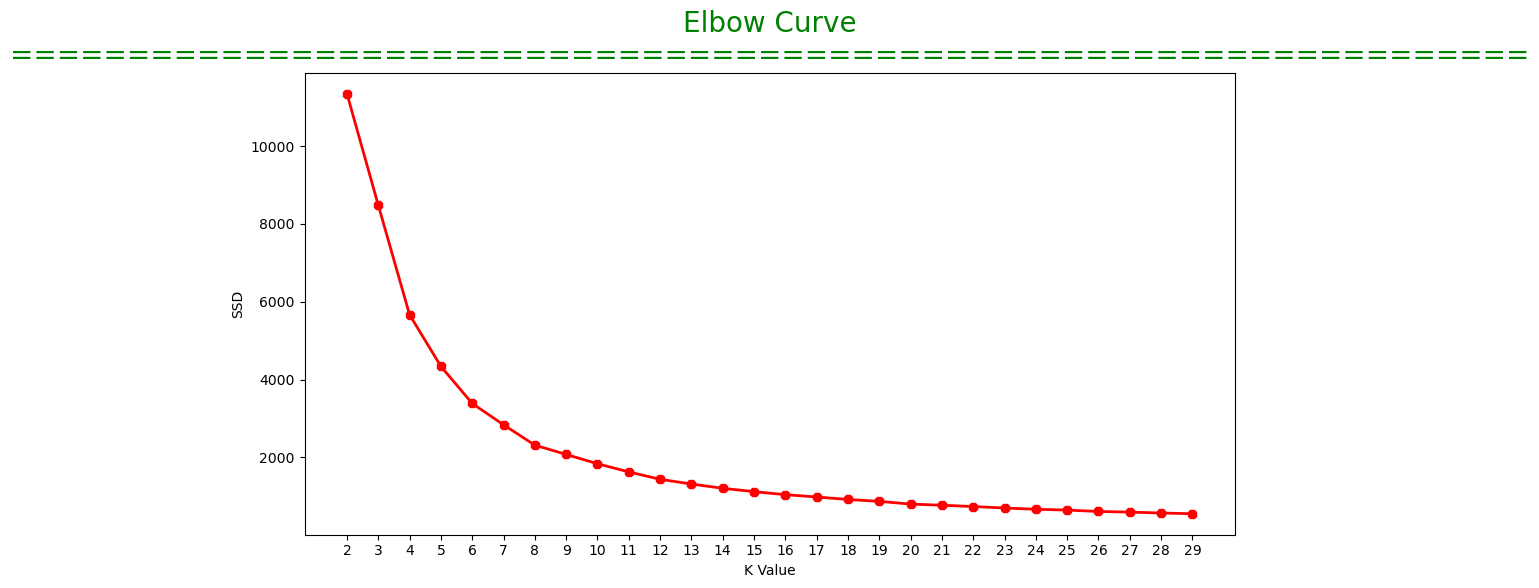

In [65]:
# Elbow method to choose number of clusters
# Get sum of square distance list
ssd = []

# Iterate clustering method to get sdd
for num_clusters in range(2,30):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=30)
    kmeans.fit(var_list)
    ssd.append(kmeans.inertia_)
    
# Show elbow method
plt.figure(figsize=(12,6))

plt.plot(range(2,30), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(2,30,1))
plt.ylabel("SSD")

plt.show()

In [66]:
# Choose 6 clusters to apply
kmeans = KMeans(n_clusters=6, max_iter=30)
kmeans.fit(var_list)
df_mua_pca["Label"] = kmeans.labels_
df_mua_pca

0         1         2         3         4         5         6  \
0    -2.458305 -1.476554 -6.647398  1.054045  0.601980  0.661451 -0.107530   
1     1.249626  3.158710  0.007158  0.570493  0.116894  0.422182 -0.201673   
2     0.995380  3.769677 -0.306205  0.174254 -0.398325 -0.245543  0.406826   
3    -0.365030  1.115650 -2.328971  0.500587  0.056273  1.580412  1.143980   
4    -0.404418  1.131925 -1.991988  0.008109 -0.015384  0.248160  0.244307   
...        ...       ...       ...       ...       ...       ...       ...   
1013 -0.113634  0.391426 -0.898558  0.342549 -0.301235 -0.581651  0.127493   
1014 -1.320318 -2.599390 -1.293955  0.122261 -0.012393 -1.095417 -0.883891   
1015 -0.574505 -1.883336  0.618731  0.231679 -0.630622  0.409373 -0.732184   
1016 -1.384514 -4.057004  0.474641  0.201125  0.474108 -0.865023  0.211765   
1017 -0.679743 -3.028485  1.641042  1.267072 -1.042677  1.701471 -0.240177   

             7         8         9  ...        11        12        13  \
0     0.522605  0.405483  1.873406  ... -1.250793 -1.226936 -1.897731   
1    -0.051642  0.241317 -0.562790  ...  0.917218  0.208048 -0.276605   
2    -0.175866 -0.499722 -1.912686  ...  1.236454  0.227779  0.708274   
3     0.476807  0.252512  0.534889  ... -0.449735 -0.651132 -1.166712   
4    -0.307935 -0.303330 -0.411083  ...  1.128038 -0.302892 -0.471708   
...        ...       ...       ...  ...       ...       ...       ...   
1013 -0.347494  0.088438 -0.660128  ... -0.678932 -0.339227 -0.113271   
1014  0.269474  0.082676 -2.512982  ... -0.927276 -1.148589  1.195006   
1015 -0.070565 -0.013421 -0.379112  ...  0.398665 -0.019810 -0.805439   
1016  2.269931 -1.174820 -0.212627  ...  0.231820 -0.610083 -1.123479   
1017  0.321542  0.816847 -2.043727  ... -0.582708 -0.078755 -0.861742   

            14        15        16        17        18        19  Label  
0    -0.563287  0.479789 -2.239979 -1.570074  0.148711 -0.807593      3  
1    -0.108838  0.522817 -0.176552 -0.064419 -0.845581 -0.524059      1  
2     0.680535  0.898090  0.686037  1.599453 -0.792889 -0.906768      1  
3    -1.490206  0.651691 -1.208176  0.304178 -0.206236  0.078701      3  
4    -0.079462  0.388827 -0.011912 -0.222167 -0.483621  0.244485      3  
...        ...       ...       ...       ...       ...       ...    ...  
1013  0.555209  0.241091 -0.346403  0.701274 -0.424790  0.697603      3  
1014  0.480306 -2.334433 -1.539089  1.105135 -2.497493 -0.398734      3  
1015  0.814772  1.237165 -0.570697  0.661437 -0.489021 -0.517829      5  
1016  0.543464 -1.110232 -0.103375 -1.465344 -0.706390 -2.481784      5  
1017  1.928922  1.767682  0.615165  1.044893 -1.412788  1.274440      5  

[1018 rows x 21 columns]

In [67]:
# Visualize clusters
fig = px.scatter_3d(data_frame = df_mua_pca, x= 0, y = 1, z= 2, color='Label', size_max=18)
fig.update_layout(
    title='Clustering method', 
    autosize=False,
    width=500, 
    height=500,
    margin={"l":65, "r":50, "b":65, "t":90},
    scene={
        "xaxis_title":'PC1',
        "yaxis_title":'PC2',
        "zaxis_title":'PC3',
    },
)
fig.show()

Most observations have a medium level of price volatility (represented as the central cluster on the graph).
<br>We can see that the data is clustered together and there are very few outliers.

# Conclusion
So, some questions have been raised, some have been answered, and some remain unanswered. However, overall, we can see that predicting stock prices based on past data is entirely feasible. Principal component analysis helps us identify the characteristics of the dataset, but there are still limitations when it comes to reversing the process to the original dataset. Additionally, we intend to construct an alpha matrix for each stock with an index ranging from -1.0 to 1.0 to help investors make decisions on whether to buy long or short and with how much money based on analysis. Due to a lack of knowledge and time, this idea is only at the conceptual stage.

# Evaluation
|      Họ và Tên     |   MSSV   | Tỉ lệ % đóng góp |
|:------------------:|:--------:|:----------------:|
| Nguyễn Ngọc Thành  | 21280108 |       20%       |
| Trần Minh Hiển     | 21280016 |       20%       |
| Thân Hàn Bảo Minh  | 21280032 |       20%       |
| Nguyễn Thành Trung | 21280055 |       20%       |
| Nguyễn Đăng Khôi   | 21280023 |       20%       |

# Reference links

<a href="https://www.youtube.com/watch?v=tNw9yHrqFl8">Phương pháp phân tích thành phần chính trong xử lý số liệu nhiều chiều và các ứng dụng <-LINK</a>

<a href="https://www.youtube.com/watch?v=BIRB2DmAR8U">How to Perform Clustering Analysis? | An Example with Supermarket Transactions Data <-LINK</a>

<a href="https://www.ssi.com.vn/tin-tuc/tin-tuc-chung/chung-khoan-phai-sinh-la-gi">Chứng khoán phái sinh là gì? <-LINK</a>

<a href="https://www.european-poultry-science.com/Multiple-linear-regression-models-based-on-principal-component-scores-to-predict-slaughter-weight-of-broiler,QUlEPTQyMTg5ODEmTUlEPTE2MTAxNA.html">Multiple linear regression with pca <-LINK</a>

WorldQuant Brain document

<a href="https://www.google.com/amp/s/www.mlq.ai/stock-market-clustering-with-k-means/amp/">Unsupervised Learning: Stock Market Clustering with K-Means <-LINK</a>


<a href="https://www.kaggle.com/code/raoulma/ny-stock-price-prediction-rnn-lstm-gru">NY Stock Price Prediction RNN LSTM GRU <-LINK</a>

<a href="https://www.kaggle.com/code/piyushagni5/multi-dimensional-data-visualization-eda">Multi-dimensional Data Visualization | EDA <-LINK</a>